In [164]:
import pandas as pd
import sys
# Req for package
sys.path.append("../")
from SkinLearning.NN.Helpers import train, test, DEVICE, get_parameter_loss, set_seed, kfcv
from SkinLearning.NN.Models import MultiTemporal
from SkinLearning.Utils.Dataset import get_dataset, get_split
from SkinLearning.Utils.Plotting import plot_parameter_bars, print_curves
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv("../Results/KFCV/CNN_Temp.csv")

In [4]:
display(df)

,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
0,0,"RNN, Single FC, Final Output",4.789774,16.102581,0.226659,0.249721,21.842530,8.157157,8.561403,0.050310,0
1,1,"GRU, Single FC, Final Hidden",2.970484,13.709017,0.145719,0.174728,10.855662,4.311267,5.361147,0.034965,0
2,2,"LSTM, Multi FC, Final Output",3.595735,10.772459,0.174093,0.140132,10.360636,5.192973,5.039338,0.034926,0
3,0,"RNN, Single FC, Final Output",3.718994,10.958085,0.185680,0.162704,16.108633,6.534859,6.278159,0.037007,1
4,1,"GRU, Single FC, Final Hidden",2.475453,9.263675,0.125027,0.123971,9.042543,3.598881,4.104925,0.026599,1
5,2,"LSTM, Multi FC, Final Output",2.521491,9.270358,0.136649,0.124275,9.348806,4.510238,4.318636,0.028109,1
6,0,"RNN, Single FC, Final Output",3.124371,11.176588,0.160569,0.152586,14.135104,6.466357,5.869262,0.034176,2
7,1,"GRU, Single FC, Final Hidden",2.370281,9.354948,0.114332,0.102689,9.330448,3.145800,4.069749,0.023920,2
8,2,"LSTM, Multi FC, Final Output",2.425916,9.518193,0.116949,0.125682,8.942152,4.471201,4.266682,0.028047,2
9,0,"RNN, Single FC, Final Output",2.836125,9.497561,0.139560,0.139781,16.121042,5.551889,5.714326,0.030103,3


In [16]:
means

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
Architecture,,,,,,,,,,
"GRU, Single FC, Final Hidden",1.0,1.986946,8.571995,0.096999,0.100593,7.709288,3.229962,3.615964,0.021993,4.5
"LSTM, Multi FC, Final Output",2.0,1.895228,7.629513,0.093886,0.094792,7.403741,3.730776,3.474656,0.021603,4.5
"RNN, Single FC, Final Output",0.0,2.718686,9.407326,0.135766,0.128596,13.129205,5.182162,5.116957,0.028615,4.5


(0.0, 14.0)

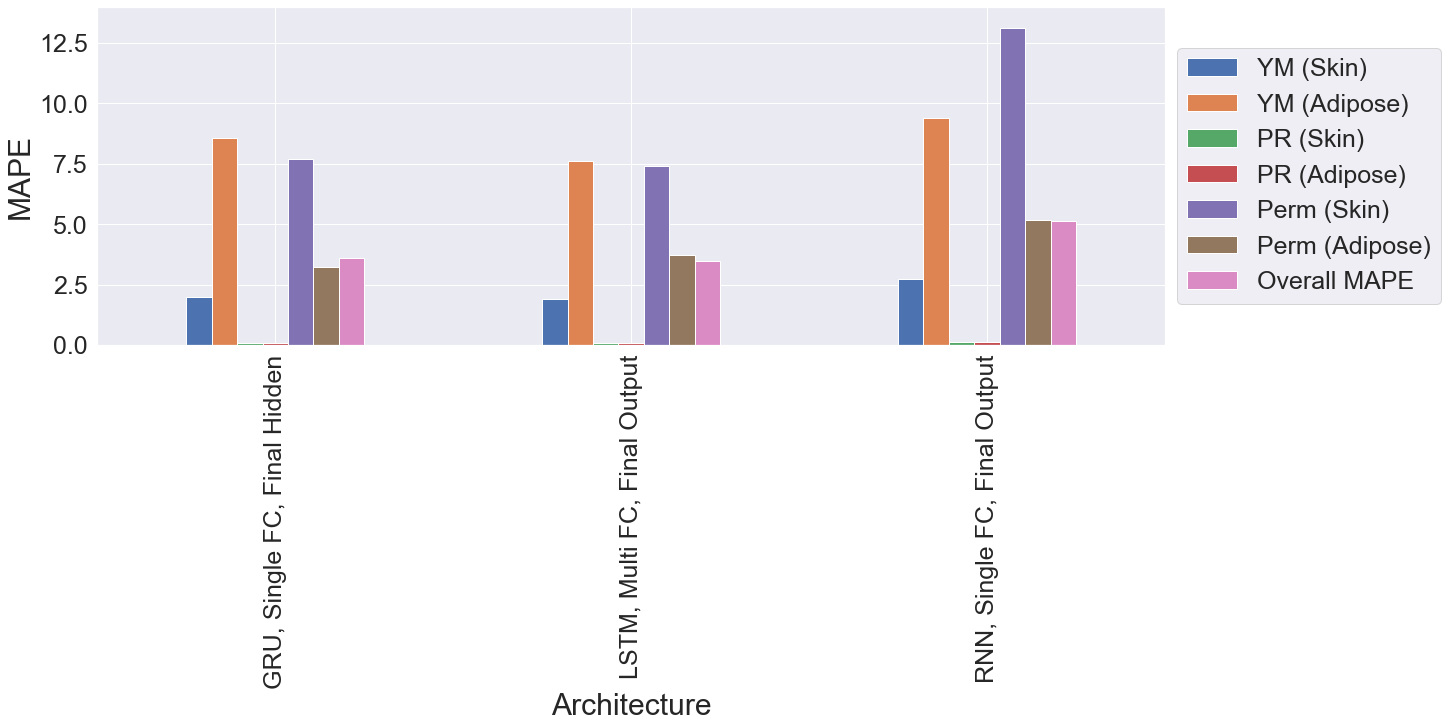

In [21]:
import seaborn as sns
sns.set_theme()
means = df.groupby("Architecture").mean().drop(columns=['Unnamed: 0', 'runs', 'Overall MAE'])
fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
means.plot.bar(ax=ax)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_ylabel("MAPE", fontsize=30)
ax.set_xlabel("Architecture", fontsize=30)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
ax.set_ylim(0, 14)


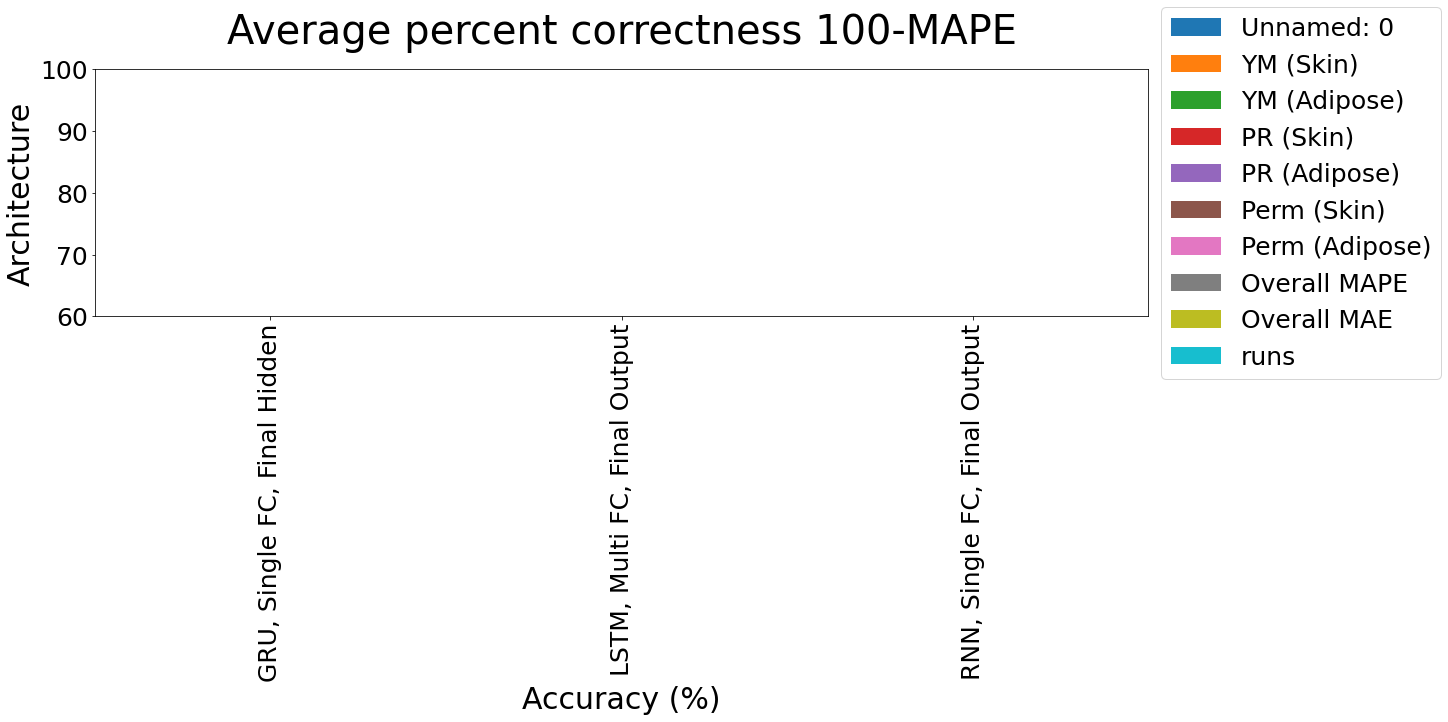

In [12]:
plot_parameter_bars(means)

In [4]:
2.5e4 == 25e3

True

# Kfold on all temporal net combinations

## CNNs

In [47]:
pd.read_csv("../Results/KFCV/CNN/GRU_single.csv")

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'GRU', True)",2.533868,9.820941,0.123735,0.117860,11.105070,4.057830,4.626551,0.027254
1,"('f_hidden', 'GRU', True)",2.839925,10.482597,0.139091,0.134823,10.979445,3.854187,4.738345,0.029782
2,"('hidden', 'GRU', True)",3.416084,10.309080,0.164047,0.143933,11.992243,5.070101,5.182582,0.033944
3,"('f_output', 'GRU', True)",3.474483,11.577420,0.174544,0.156244,14.051684,4.554019,5.664732,0.034987
4,"('h+o', 'GRU', True)",3.688588,13.067810,0.181984,0.168827,12.819638,4.486412,5.735543,0.038983


In [48]:
pd.read_csv("../Results/KFCV/CNN/GRU_multi.csv")

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'GRU', False)",2.588451,10.190471,0.119399,0.128375,13.731329,4.243684,5.166951,0.027764
1,"('f_hidden', 'GRU', False)",3.423186,9.742709,0.159503,0.125713,10.385247,3.602488,4.573141,0.030479
2,"('f_output', 'GRU', False)",3.783559,11.725313,0.182402,0.172179,12.816945,4.606555,5.547825,0.037251
3,"('hidden', 'GRU', False)",4.153500,11.588172,0.196279,0.156829,12.717169,6.405572,5.869588,0.039414
4,"('h+o', 'GRU', False)",3.675978,12.960546,0.176480,0.194397,10.832530,4.275421,5.352558,0.039524


In [311]:
gru = pd.read_csv("../Results/KFCV/CNN/GRU.csv")
lstm = pd.read_csv("../Results/KFCV/CNN/LSTM.csv")
rnn = pd.read_csv("../Results/KFCV/CNN/RNN.csv")

In [312]:
cnns = pd.concat([gru, lstm, rnn])

In [313]:
cnns = cnns.rename(columns={'Unnamed: 0': 'Architecture'})

In [8]:
def get_architecture_name(x, wpd=False):
    x = x.split("'")[1:]
    x.remove(", ")
    print(x)
    
    x[-1].replace(", ", "")
    x[-1] = x[-1].replace(")", "")
    
    x[-1] = x[-1].replace(", ", "")
    x[-1] = eval(x[-1])
    
    if wpd:
        x[3] = x[3][:6] if x[0] == 'Concatenate' else x[3][:5]
    
    return f"{x[3].capitalize() if wpd else ''} {x[1]}, FC x{'1' if x[-1] else '3'}, {x[0]}"

In [315]:
cnns['Architecture'] =  cnns['Architecture'].apply(lambda x: get_architecture_name(x))

['output', 'GRU', ', False)']
 GRU, FC x3, output
['f_hidden', 'GRU', ', True)']
 GRU, FC x1, f_hidden
['f_output', 'GRU', ', True)']
 GRU, FC x1, f_output
['f_hidden', 'LSTM', ', True)']
 LSTM, FC x1, f_hidden
['output', 'LSTM', ', True)']
 LSTM, FC x1, output
['f_hidden', 'LSTM', ', False)']
 LSTM, FC x3, f_hidden
['f_output', 'RNN', ', False)']
 RNN, FC x3, f_output
['h+o', 'RNN', ', False)']
 RNN, FC x3, h+o
['output', 'RNN', ', False)']
 RNN, FC x3, output


In [316]:
cnns = cnns.set_index(['Architecture'])

In [317]:
cnns

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"GRU, FC x3, output",2.222450,9.614604,0.104374,0.134077,10.420935,3.877564,4.395667,0.026035
"GRU, FC x1, f_hidden",2.517912,9.411774,0.125433,0.120470,9.777822,3.325574,4.213164,0.026262
"GRU, FC x1, f_output",3.181138,8.337201,0.142449,0.106400,10.013922,3.823132,4.267374,0.027516
"LSTM, FC x1, f_hidden",2.084959,8.505416,0.107710,0.104581,7.950046,3.006329,3.626507,0.022962
"LSTM, FC x1, output",2.464321,8.572371,0.103587,0.094896,9.270177,2.978430,3.913964,0.023221
"LSTM, FC x3, f_hidden",2.299173,8.545232,0.115158,0.103606,9.726789,3.405267,4.032538,0.023950
"RNN, FC x3, f_output",2.258512,8.114416,0.112529,0.105910,8.524662,3.628058,3.790681,0.023627
"RNN, FC x3, h+o",2.439509,10.451700,0.123345,0.117858,9.692329,4.232755,4.509583,0.028016
"RNN, FC x3, output",3.017380,9.574201,0.130133,0.144608,13.111383,5.915588,5.315549,0.030473


### Get top CNN networks

In [318]:
cnns = cnns.nsmallest(3, 'Overall MAE')

In [319]:
max(cnns.max())

9.270176887512209

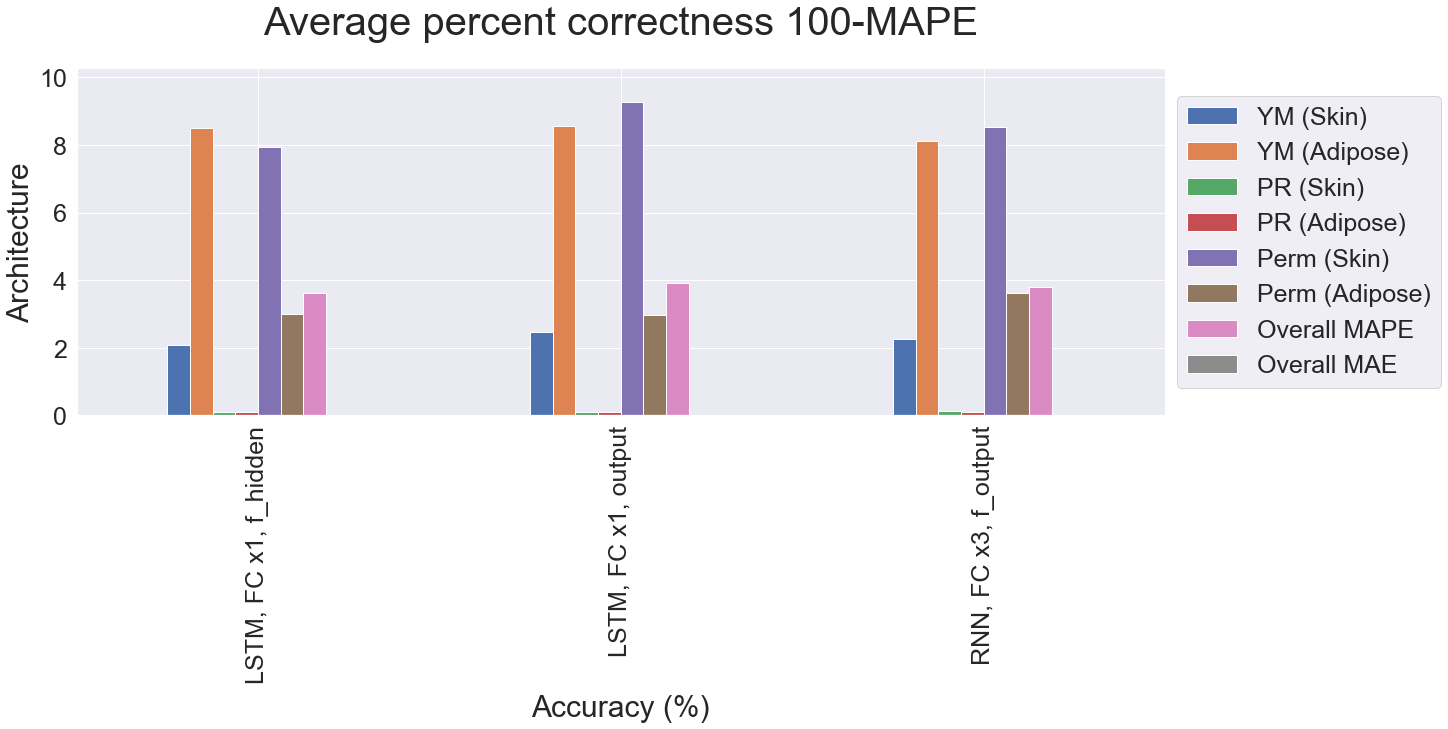

In [320]:
plot_parameter_bars(cnns, max_y=max(cnns.max())+1)

In [322]:
cnns.to_csv("../Results/KFCV/CNN/top_3_temporal.csv")

In [12]:
pd.read_csv("../Results/KFCV/WPD/top_3_temporal(largerHidden).csv")

,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"Conca RNN, FC x3, h+o",4.855326,13.851527,0.239294,0.193429,13.604988,4.010625,6.125865,0.043722
1,"Conca RNN, FC x3, f_output",4.716166,14.573893,0.230913,0.210003,10.645582,3.984613,5.726862,0.044162
2,"Conca GRU, FC x3, f_output",5.051675,13.260800,0.254175,0.189188,12.323178,3.818988,5.816334,0.044226


## WPD

Model 1: 5.225210666656494, MAE: 0.03297172291525479
Model 2: 5.071382999420166, MAE: 0.03324704925470017
Model 3: 5.009763240814209, MAE: 0.03325633323370603
Model 4: 5.5245866775512695, MAE: 0.03536424990192863
Elapsed time: 10 hours, 29 minutes, 43 seconds

In [3]:
gru_indep = pd.read_csv("../Results/KFCV/WPD/GRU_independent.csv")
gru_concat = pd.read_csv("../Results/KFCV/WPD/GRU_concatenate.csv")
lstm_indep = pd.read_csv("../Results/KFCV/WPD/LSTM_independent.csv")
lstm_concat = pd.read_csv("../Results/KFCV/WPD/LSTM_concatenate.csv")
rnn_indep = pd.read_csv("../Results/KFCV/WPD/RNN_independent.csv")
rnn_concat = pd.read_csv("../Results/KFCV/WPD/RNN_concatenate.csv")

In [ ]:
def get_group_stats(architecture_index)

In [15]:
wpds

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('f_output', 'GRU', 'independent', True)",3.522048,10.664265,0.173645,0.124640,10.733866,3.552823,4.795214,0.031454
1,"('h+o', 'GRU', 'independent', True)",3.599894,11.196172,0.177847,0.138551,11.384942,3.599463,5.016145,0.033036
2,"('f_output', 'GRU', 'independent', False)",3.699143,10.979154,0.184101,0.130256,10.871145,3.571321,4.905853,0.033147
3,"('f_hidden', 'GRU', 'independent', False)",3.646779,11.855492,0.182800,0.143658,12.131579,3.331151,5.215243,0.034141
4,"('h+o', 'GRU', 'independent', False)",3.825199,11.452570,0.186164,0.139234,13.247940,3.842906,5.449003,0.034725
5,"('output', 'GRU', 'independent', True)",3.906118,12.036929,0.193078,0.148619,11.968383,3.792294,5.340903,0.035847
6,"('output', 'GRU', 'independent', False)",4.060275,11.825900,0.203691,0.142283,12.896799,3.800320,5.488212,0.035998
7,"('f_hidden', 'GRU', 'independent', True)",4.124944,12.930635,0.206300,0.158132,12.041056,3.855814,5.552814,0.038087
8,"('hidden', 'GRU', 'independent', False)",8.391495,72.983521,0.321774,0.967468,185.670776,128.868668,66.200623,0.184641
9,"('hidden', 'GRU', 'independent', True)",8.541632,72.720772,0.316459,0.969972,180.761078,134.636414,66.324387,0.184809


In [24]:
gru_indep = pd.read_csv("../Results/KFCV/WPD/GRU_independent_top3.csv")
gru_concat = pd.read_csv("../Results/KFCV/WPD/GRU_concatenate_top3.csv")
lstm_indep = pd.read_csv("../Results/KFCV/WPD/LSTM_independent_top3.csv")
lstm_concat = pd.read_csv("../Results/KFCV/WPD/LSTM_concatenate_top3.csv")
rnn_indep = pd.read_csv("../Results/KFCV/WPD/RNN_independent_top3.csv")
rnn_concat = pd.read_csv("../Results/KFCV/WPD/RNN_concatenate_top3.csv")

In [25]:
wpds = pd.concat([
    gru_indep,
    gru_concat,
    lstm_indep,
    lstm_concat,
    rnn_indep,
    rnn_concat
])

In [ ]:
wpd_best = pd.read_csv("../Results/WPD/")

In [26]:
wpds = wpds.rename(columns={'Unnamed: 0': 'Architecture'})

In [27]:
wpds['Architecture'] =  wpds['Architecture'].apply(lambda x: get_architecture_name(x, wpd=True))

['f_output', 'GRU', ', ', 'independent', ', True)']
['h+o', 'GRU', ', ', 'independent', ', True)']
['f_output', 'GRU', ', ', 'independent', ', False)']
['f_hidden', 'GRU', ', ', 'independent', ', False)']
['output', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'GRU', ', ', 'concatenate', ', True)']
['hidden', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'LSTM', ', ', 'independent', ', False)']
['f_output', 'LSTM', ', ', 'independent', ', False)']
['output', 'LSTM', ', ', 'independent', ', False)']
['h+o', 'LSTM', ', ', 'independent', ', False)']
['hidden', 'LSTM', ', ', 'concatenate', ', True)']
['f_hidden', 'LSTM', ', ', 'concatenate', ', True)']
['f_output', 'LSTM', ', ', 'concatenate', ', False)']
['h+o', 'LSTM', ', ', 'concatenate', ', False)']
['output', 'RNN', ', ', 'independent', ', False)']
['f_output', 'RNN', ', ', 'independent', ', True)']
['f_hidden', 'RNN', ', ', 'independent', ', True)']
['h+o', 'RNN', ',

In [28]:
wpds = wpds.set_index(['Architecture'])

### Get top WPDs

In [29]:
wpds = wpds.nsmallest(3, 'Overall MAE')

In [36]:
rnn_indep

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'RNN', 'independent', False)",3.585111,10.991482,0.175439,0.133863,12.212572,3.477660,5.096021,0.032948
1,"('f_output', 'RNN', 'independent', True)",3.577564,11.479879,0.181976,0.131287,12.618166,4.017773,5.334441,0.032983
2,"('f_hidden', 'RNN', 'independent', True)",3.543859,11.624982,0.171796,0.142737,11.531916,3.632362,5.107942,0.033556
3,"('h+o', 'RNN', 'independent', True)",3.783633,11.558032,0.188531,0.134157,12.292387,3.775451,5.288699,0.034356


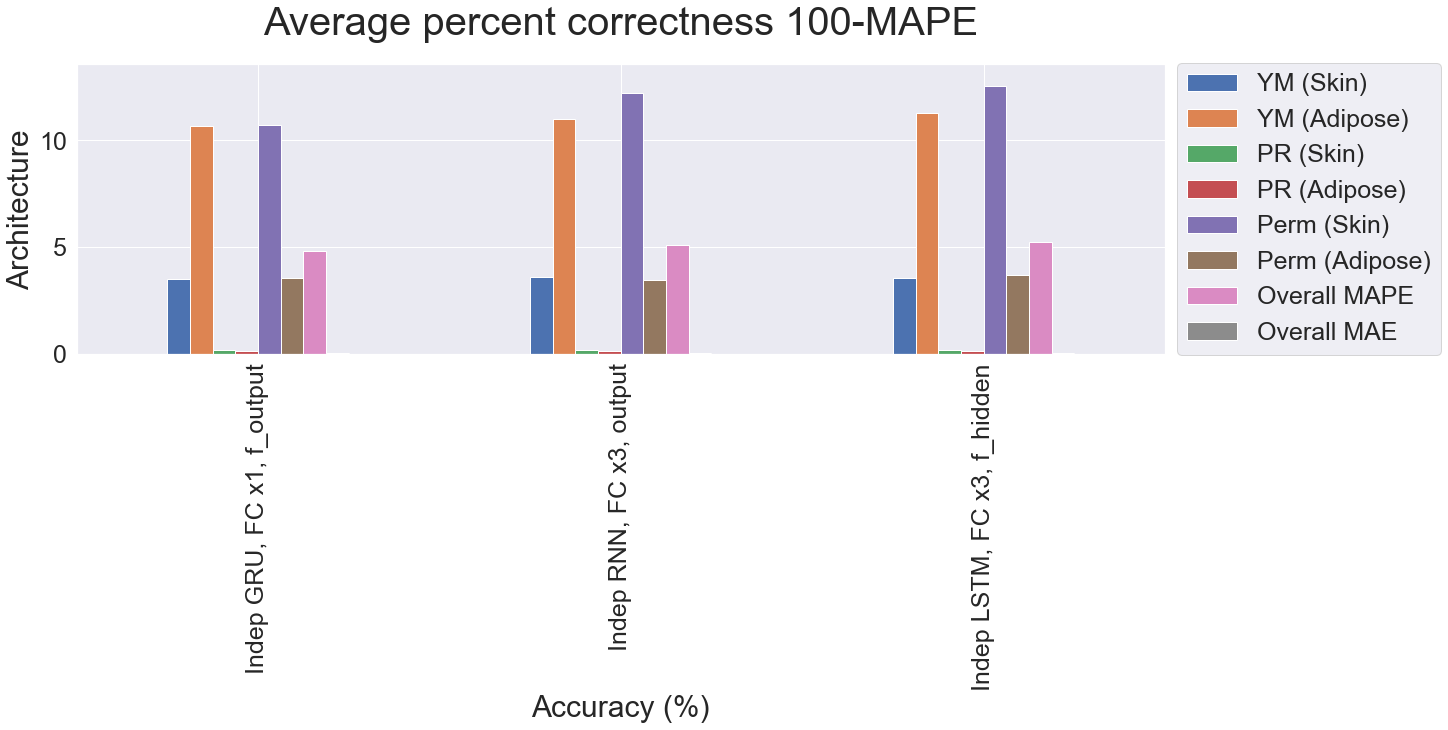

In [31]:
plot_parameter_bars(wpds, max_y=max(wpds.max())+1)

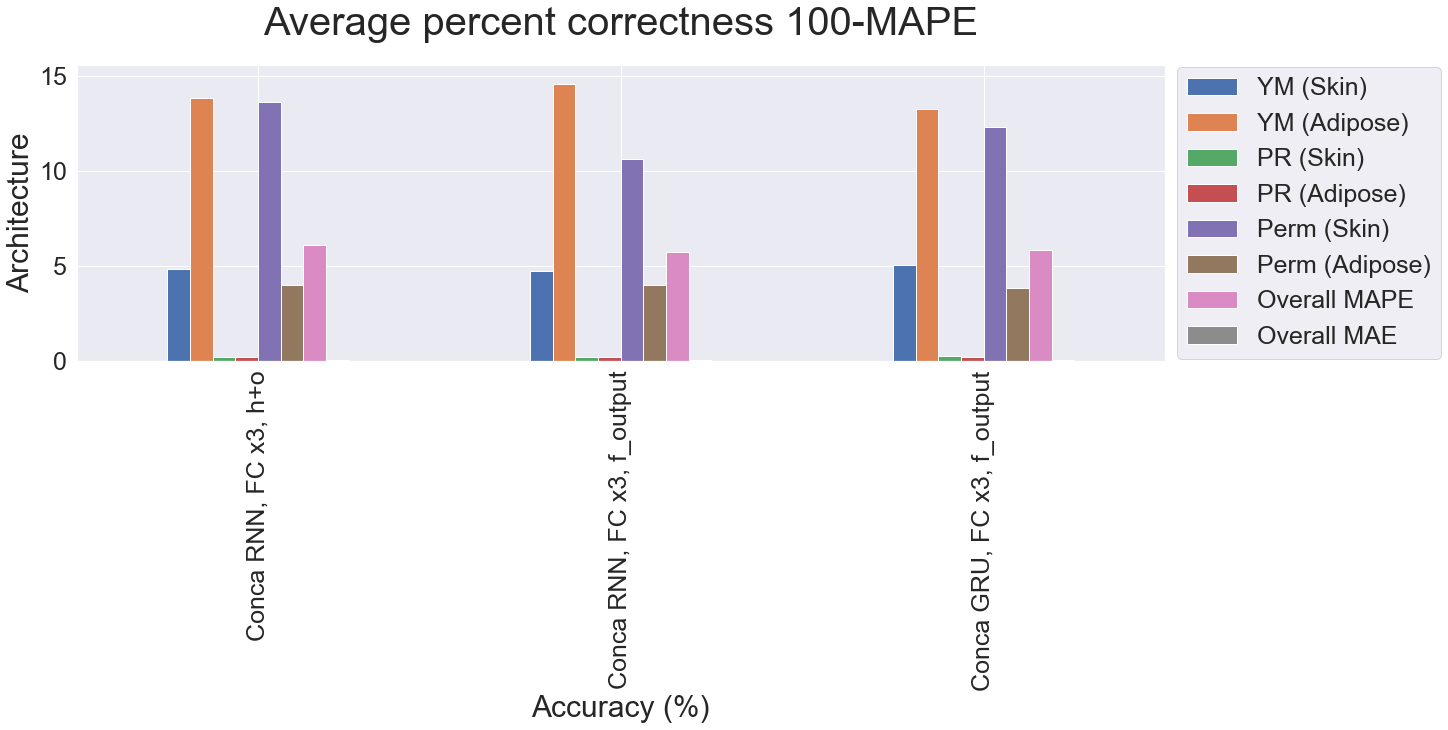

In [471]:
plot_parameter_bars(wpds, max_y=max(wpds.max())+1)

In [ ]:
wpds

### Further FCs

In [429]:
m1 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_1.csv")
m2 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_2.csv")
m3 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_3.csv")
m4 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_(1024)3.csv")

In [464]:
display(m4)
display(m3)

,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,0,"Concatenate, GRU, multi FC, output 1024",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,0,"Concatenate, GRU, multi FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


In [430]:
m4['Architecture']='Concatenate, GRU, multi FC, output 1024'

In [455]:
wpds_fc = pd.concat([m1, m2, m3, m4])

In [456]:
wpds_fc = wpds_fc.drop(columns='Unnamed: 0')

In [457]:
def get_arches(x):
    x = x.split(', ')
    
    out = x[-1].split(' ')
    further_fc = False
    if len(out) == 2:
        further_fc = True
        x[-1] = out[0]
        
    
    x[0] = x[0][:6] if x[0] == 'Concatenate' else x[0][:5]
    x[2] = f'x{4 if x[-1] != "output" else (7 if not further_fc else 6)} FC'
    
    return ', '.join(x)

In [458]:
wpds_fc['Architecture'] =  wpds_fc['Architecture'].apply(lambda x: get_arches(x))

In [459]:
wpds_fc = wpds_fc.set_index(['Architecture'])

In [460]:
wpds_fc

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"Indep, RNN, x4 FC, f_hidden",5.228603,18.000797,0.258193,0.247503,13.694014,5.034026,7.077189,0.051026
"Concat, GRU, x4 FC, f_output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263
"Concat, GRU, x7 FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263
"Concat, GRU, x6 FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


In [461]:
wpds_fc.to_csv("../Results/KFCV/WPD/Further_FCs_all.csv")

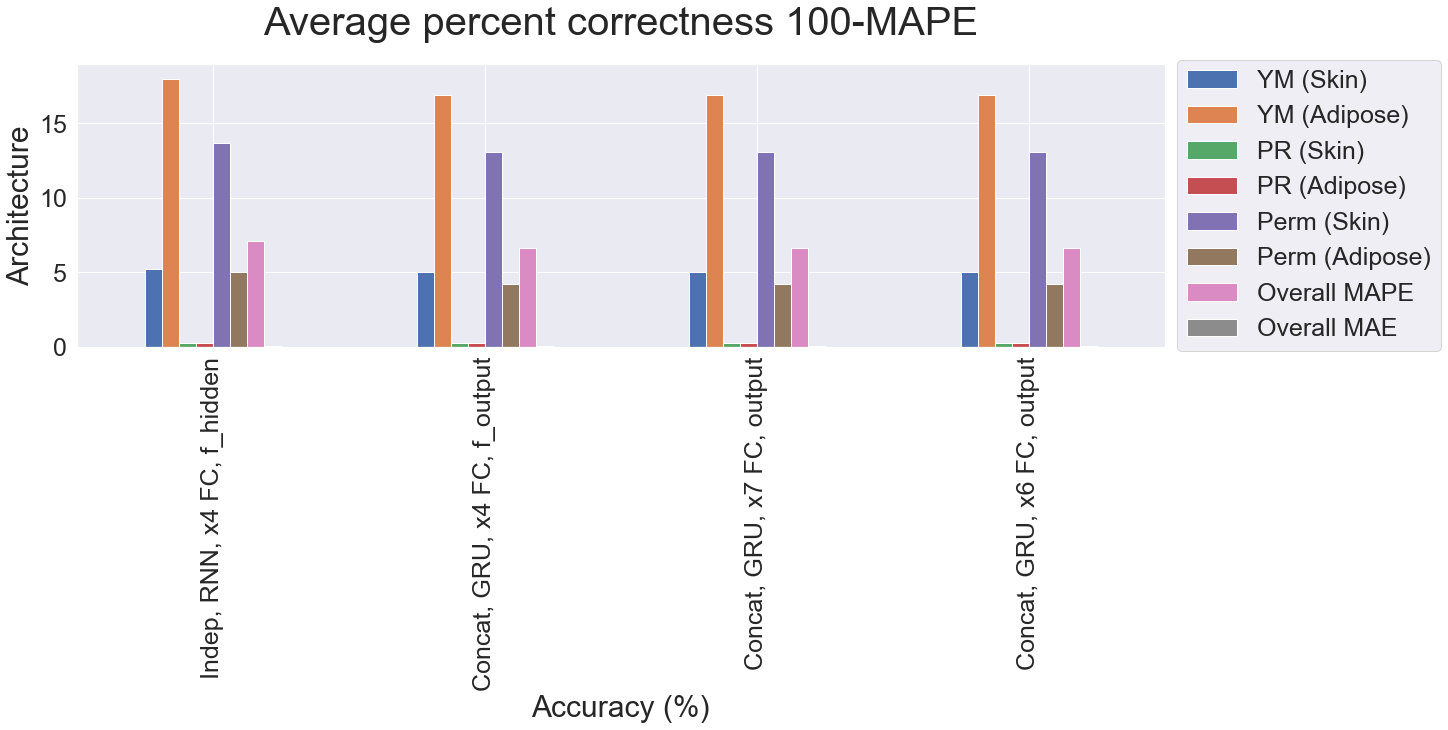

In [462]:
plot_parameter_bars(wpds_fc, max_y=max(wpds_fc.max())+1)

# All results

# WPD analysis

In [3]:
import os
import pandas as pd

def process_columns(dataframe, further_fc=False):
    # Split the "Unnamed: 0" column into a list of tuples
    col = 'Unnamed: 0'
    if 'Architecture' in dataframe:
        if 'Unnamed: 0' in dataframe:
            dataframe = dataframe.drop(columns=[col])
        col = 'Architecture'

    temp_list = [eval(x) for x in dataframe[col]]
    
    def parse_out(x):
        if x == 'hidden':
            return 'Hidden'
        if x == 'output':
            return 'Output'
        if x == 'f_output':
            return 'Fin. Output'
        if x == 'f_hidden':
            return 'Fin. Hidden'
        if x == 'h+o':
            return 'Fin. Hid. + Fin. Out.'
    
    temp_list = temp_list[0]
    # Create new columns from the list of tuples
    if len(temp_list[0]) == 4:
        dataframe['Output'] = [parse_out(x[0]) for x in temp_list]
        dataframe['Temporal Type'] = [x[1] for x in temp_list]
        #dataframe['Fusion Method'] = ['Siamese' if x[2] == 'independent' else 'Concatenate' for x in temp_list]
    
        
        if further_fc:
             dataframe['FC'] =  [x[3] for x in temp_list]
        else:
            dataframe['FC'] = [f'FC x{1 if x[3]  else 3}' for x in temp_list]
    
    else:
        # 3 for CNN
        dataframe['Output'] = [parse_out(x[0]) for x in temp_list]
        dataframe['Temporal Type'] = [x[1] for x in temp_list]
        dataframe['FC'] = [f'FC x{1 if x[2] else 3}' for x in temp_list]
    
    print(dataframe['Output'], temp_list[0][0])
    # Drop the original "Unnamed: 0" column
    dataframe.drop(columns=[col], inplace=True)
    return dataframe

# Load all result files into one dataframe
def load_and_process_files(directory, further_fc=False):
    all_files = os.listdir(directory)
    csv_files = [file for file in all_files if file.endswith('.csv')]
    dfs = []
    
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)
        df = process_columns(df, further_fc)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

directory = "../Results/KFCV/Final Comparison/Stats"
pd.set_option('display.max_rows', 500)
result_df = load_and_process_files(directory, further_fc=True)
display(result_df)


0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output


,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Run,Output,Temporal Type,FC
0,2.445120,9.684494,0.106808,0.135421,12.589968,3.777890,4.789950,0.026345,0,Output,LSTM,FC x1
1,2.346313,9.669493,0.098648,0.140638,10.185841,4.070381,4.418552,0.025738,1,Output,LSTM,FC x1
2,2.480679,9.604899,0.112328,0.135279,11.778746,3.867477,4.663235,0.026324,2,Output,LSTM,FC x1
3,2.669705,10.065669,0.111191,0.132520,12.856168,3.496714,4.888661,0.027022,3,Output,LSTM,FC x1
4,2.432425,9.889219,0.101303,0.134629,10.429564,3.639842,4.437831,0.025468,4,Output,LSTM,FC x1
5,2.264708,7.557419,0.094875,0.121489,8.870563,3.670010,3.763177,0.022944,5,Output,LSTM,FC x1
6,2.253936,10.186393,0.098917,0.138922,11.008893,3.466260,4.525553,0.025180,6,Output,LSTM,FC x1
7,2.275278,8.708627,0.095521,0.121079,9.464259,4.371389,4.172692,0.023412,7,Output,LSTM,FC x1
8,2.666201,9.566299,0.118475,0.146193,11.712355,3.851491,4.676835,0.027725,8,Output,LSTM,FC x1
9,1.990757,8.555042,0.087484,0.123831,9.548380,3.252191,3.926280,0.022458,9,Output,LSTM,FC x1


In [125]:
import inspect

# Get the function's signature
sig = inspect.signature(train)

# Print the parameter names and default values
for param in sig.parameters.values():
    print(param.name, param.default)

train_loader <class 'inspect._empty'>
net <class 'inspect._empty'>
LR 0.0001
epochs 1500
val_loader None
early_stopping False
patience 50
optimizer <class 'torch.optim.adam.Adam'>
plot False
cluster False
criterion L1Loss()


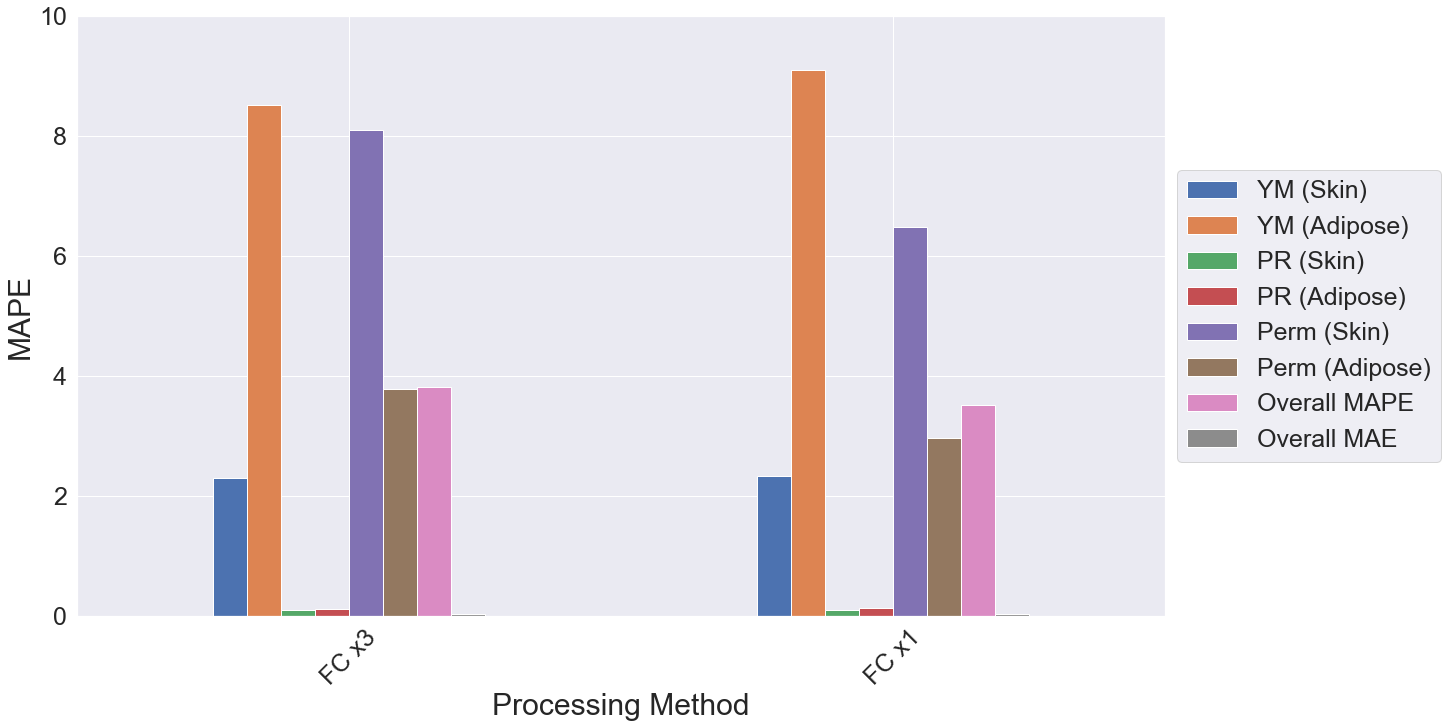

In [123]:
plot_parameter_bars(result_df)

### Temporal outputs

In [5]:
def create_boxplots(dataframe, order_column, filter_column=None, sharey=False, subgroups=True, fname=None, bar=False):
    if filter_column is None or not subgroups:
        # Create a single boxplot without filtering
        fig, ax = plt.subplots(1, 1, figsize=(10, 9))
        if bar:
            sns.barplot(data=dataframe, y='Overall MAPE', x=order_column, hue=filter_column, ax=ax)
        else:
            sns.boxplot(data=dataframe, y='Overall MAPE', x=order_column, hue=filter_column, ax=ax)

        # Set the titles and labels for the boxplot
        plt.title('')
        plt.suptitle('')  # This line removes the automatically generated title
        plt.xlabel(order_column, fontsize=30)
        plt.ylabel('MAPE', fontsize=30)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tick_params(axis='both', labelsize=20)
        #ax.legend(fontsize=20, loc='best')
        #ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
        #ax.set_yticks([])
        
        #plt.tight_layout()
        # Display the boxplot
        plt.show()
    else:
        unique_filter_values = dataframe[filter_column].unique()
        num_plots = len(unique_filter_values)

        # Create a subplot for each unique filter value
        fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 10, 9), sharey=sharey, sharex=True, constrained_layout=True)
        
        min_value = 10
        max_value = -10
        for idx, filter_value in enumerate(unique_filter_values):
            # Filter the DataFrame based on the current filter_value
            filtered_df = dataframe[dataframe[filter_column] == filter_value]

            # Create a boxplot using the filtered DataFrame, ordering by the second column
            ax = axes[idx]
            sns.barplot(data=filtered_df, ax=ax, y='Overall MAPE', x=order_column)
            #filtered_df.boxplot(column='Overall MAE', by=order_column, grid=False, ax=ax)

            # Set the titles and labels for the boxplot
            ax.set_title(f'{filter_value.capitalize() if filter_column != "FC" and filter_column != "Temporal Type" else filter_value}', fontsize=35, y=1.05, horizontalalignment='center', verticalalignment='center')
            ax.set_ylabel('MAPE')
            ax.set_xlabel('')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
            ax.tick_params(axis='both', labelsize=35)
            ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})

            # Set y-axis limits independently based on the maximum value
            max_value_current = filtered_df['Overall MAPE'].max() * 1.1
            min_value_current = filtered_df['Overall MAPE'].min() * 0.9

            if sharey:
                min_value = min_value_current if min_value_current < min_value else min_value
                max_value = max_value_current if max_value_current > max_value else max_value
            else:
                min_value =min_value_current
                max_value = max_value_current
            ax.set_ylim(min_value, max_value)

          # Set the main title for all subplots
        fig.suptitle('')
        fig.supxlabel(order_column, fontsize=50, x=0.5, y=-0.1, horizontalalignment='center', verticalalignment='bottom')
        fig.supylabel('MAE', fontsize=50, x=-0.05, y=0.5, horizontalalignment='left', verticalalignment='center', rotation='vertical')
        for ax in axes.flatten():
            ax.legend(fontsize=35)
    # Display the boxplots
    #plt.tight_layout()
    plt.show()
    if fname:
        fig.savefig(f"../Results/{fname}.png", bbox_inches='tight')

#create_boxplots(result_df, 'Temporal Type', 'Fusion Method', subgroups=False, fname="Figures/wpd_tt.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


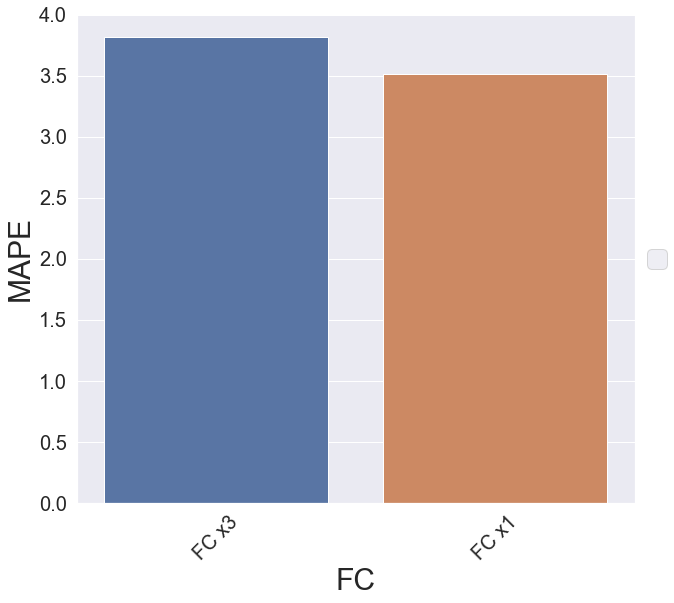

In [119]:
create_boxplots(result_df, 'FC', sharey=True, subgroups=False, bar=True, fname='/Figures/CNN_output+type')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


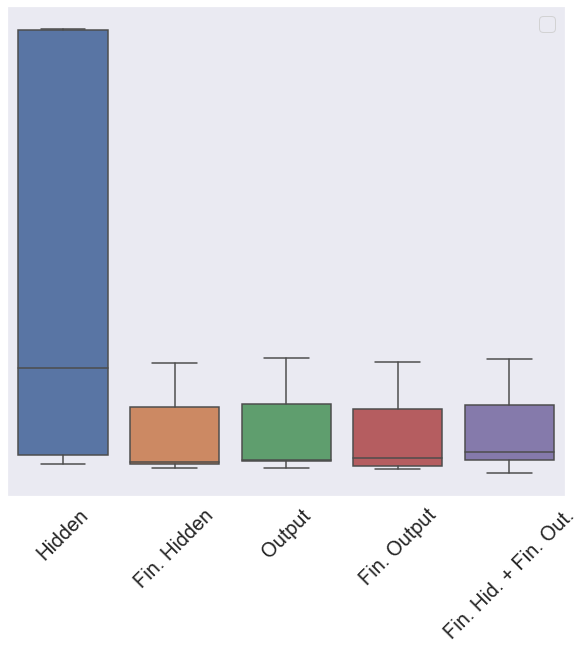

In [96]:
create_boxplots(result_df, 'Output', subgroups=False, fname="Figures/WPD_outputs.png")

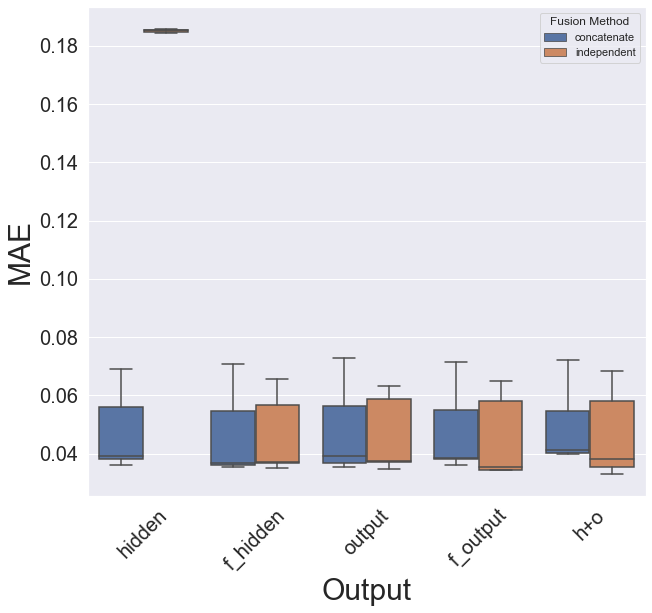

In [50]:
# Example usage
create_boxplots(result_df, 'Output', 'Fusion Method', subgroups=False)

- Hidden largely variable

### Fusion method

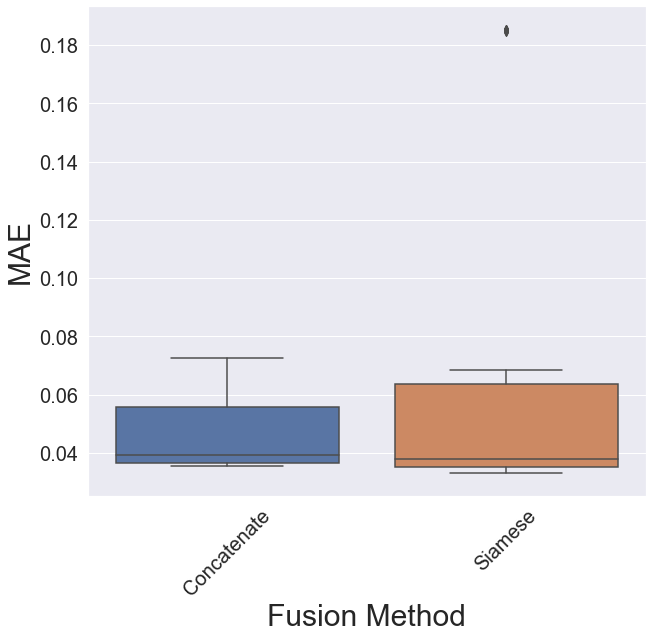

In [61]:
create_boxplots(result_df, 'Fusion Method', sharey=True, fname="Figures/WPD_fusion.png")

- Independent seems to work better overall

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


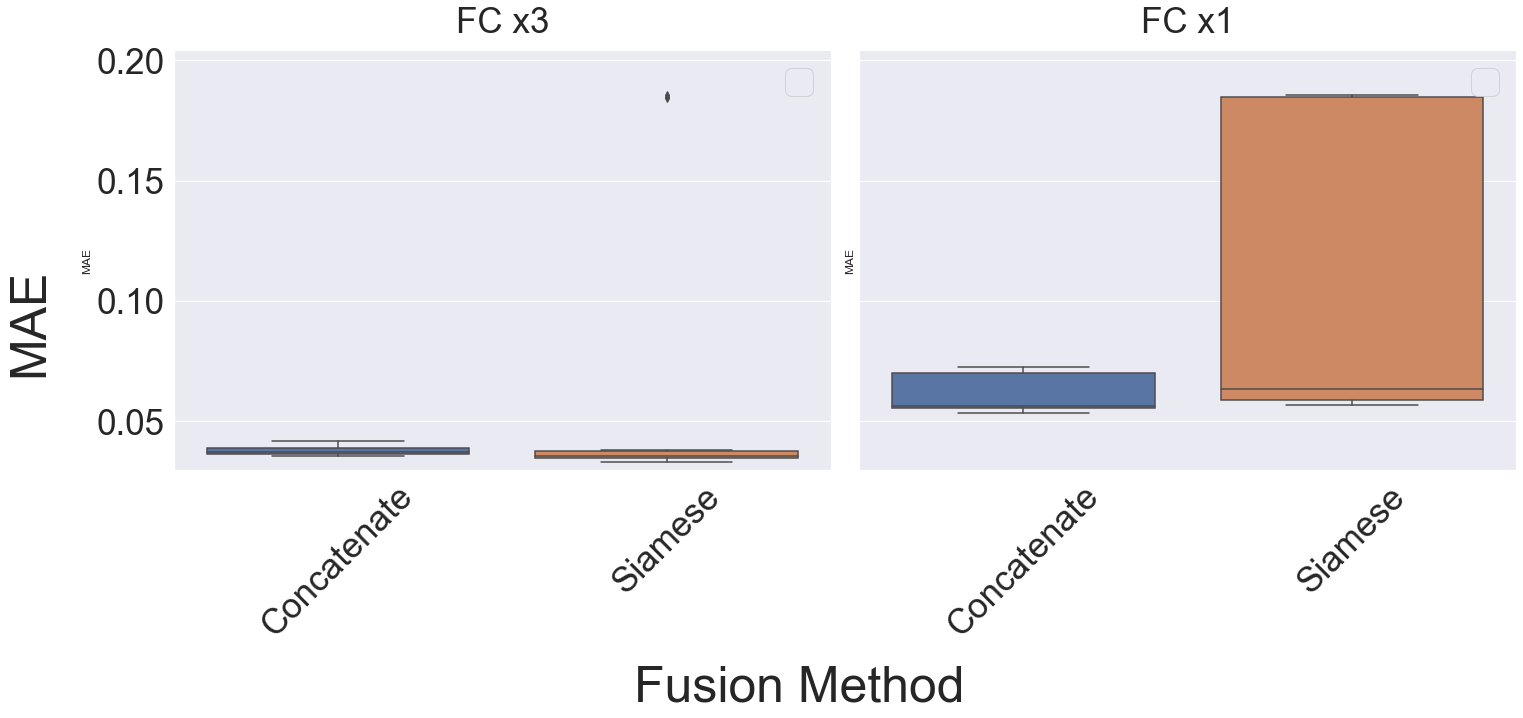

In [32]:
create_boxplots(result_df, 'Fusion Method', filter_column='FC', sharey=True)

- outliers - potential overtraining (maybe a patience of 50 was too high)
- Overall multi FC was significantly better
- Retrain best for multi FC

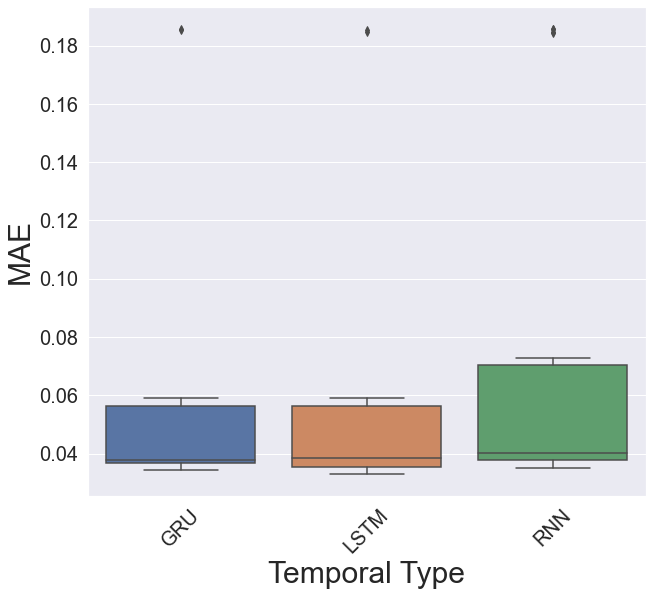

In [69]:
create_boxplots(result_df, 'Temporal Type')

### Temporal type

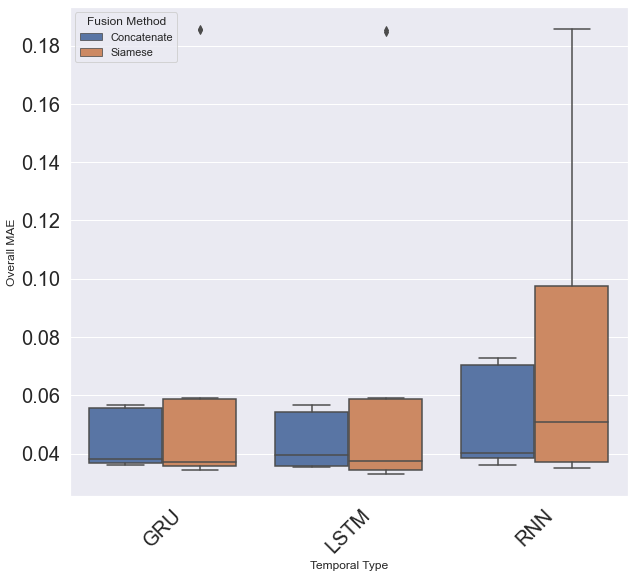

In [86]:
create_boxplots(result_df, 'Temporal Type', 'Fusion Method', subgroups=False, fname="Figures/wpd_tt.png")

### Top 3

In [326]:
result_df.drop_duplicates().nsmallest(3, 'Overall MAE')

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,Fusion Method,FC
42,3.481406,11.798580,0.171706,0.128643,12.087372,3.255801,5.153918,0.032977,h+o,LSTM,independent,FC x3
14,3.797821,11.583418,0.189825,0.132629,11.943960,3.617073,5.210788,0.034322,f_output,GRU,independent,FC x3
43,3.776099,11.207469,0.187827,0.141777,11.430681,3.120242,4.977349,0.034428,f_output,LSTM,independent,FC x3


### Further FCs

In [351]:
result_df = load_and_process_files("../Results/KFCV/WPD/FurtherFCs/", True)
display(result_df)

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,Fusion Method,FC
0,0,2.742164,9.196328,0.142216,0.116660,11.800284,2.916885,4.485756,0.027461,h+o,LSTM,independent,FC x7
1,1,2.895162,9.411008,0.148877,0.119862,10.848434,2.934815,4.393026,0.027864,f_output,GRU,independent,FC x6
2,2,3.073579,9.874134,0.146458,0.108755,11.450510,2.930333,4.597295,0.027858,f_output,LSTM,independent,FC x6


## CNNs

In [65]:
result_df = load_and_process_files("../Results/KFCV/CNN/old2")
display(result_df)

[('output', 'GRU', False), ('f_hidden', 'GRU', False), ('f_output', 'GRU', False), ('hidden', 'GRU', False), ('h+o', 'GRU', False)]
[('output', 'GRU', False), ('f_hidden', 'GRU', False), ('f_output', 'GRU', False), ('hidden', 'GRU', False)]
[('output', 'GRU', True), ('f_hidden', 'GRU', True), ('hidden', 'GRU', True), ('f_output', 'GRU', True), ('h+o', 'GRU', True)]
[('output', 'LSTM', False), ('f_output', 'LSTM', False), ('h+o', 'LSTM', False), ('f_hidden', 'LSTM', False), ('hidden', 'LSTM', False)]
[('output', 'LSTM', False), ('f_output', 'LSTM', False), ('h+o', 'LSTM', False), ('f_hidden', 'LSTM', False)]
[('output', 'LSTM', True), ('hidden', 'LSTM', True), ('f_output', 'LSTM', True), ('f_hidden', 'LSTM', True), ('h+o', 'LSTM', True)]
[('output', 'RNN', False), ('h+o', 'RNN', False), ('hidden', 'RNN', False), ('f_hidden', 'RNN', False), ('f_output', 'RNN', False)]
[('output', 'RNN', False), ('h+o', 'RNN', False), ('hidden', 'RNN', False), ('f_hidden', 'RNN', False)]
[('output', 'RNN'

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,FC
0,2.588451,10.190471,0.119399,0.128375,13.731329,4.243684,5.166951,0.027764,output,GRU,FC x3
1,3.423186,9.742709,0.159503,0.125713,10.385247,3.602488,4.573141,0.030479,f_hidden,GRU,FC x3
2,3.783559,11.725313,0.182402,0.172179,12.816945,4.606555,5.547825,0.037251,f_output,GRU,FC x3
3,4.153500,11.588172,0.196279,0.156829,12.717169,6.405572,5.869588,0.039414,hidden,GRU,FC x3
4,3.675978,12.960546,0.176480,0.194397,10.832530,4.275421,5.352558,0.039524,h+o,GRU,FC x3
5,2.588451,10.190471,0.119399,0.128375,13.731329,4.243684,5.166951,0.027764,output,GRU,FC x3
6,3.423186,9.742709,0.159503,0.125713,10.385247,3.602488,4.573141,0.030479,f_hidden,GRU,FC x3
7,3.783559,11.725313,0.182402,0.172179,12.816945,4.606555,5.547825,0.037251,f_output,GRU,FC x3
8,4.153500,11.588172,0.196279,0.156829,12.717169,6.405572,5.869588,0.039414,hidden,GRU,FC x3
9,2.533868,9.820941,0.123735,0.117860,11.105070,4.057830,4.626551,0.027254,output,GRU,FC x1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


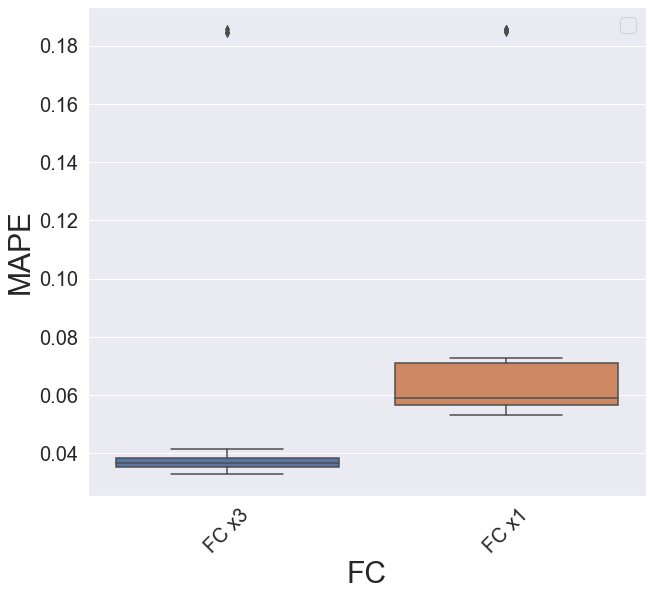

In [46]:
create_boxplots(result_df, 'FC', sharey=True)

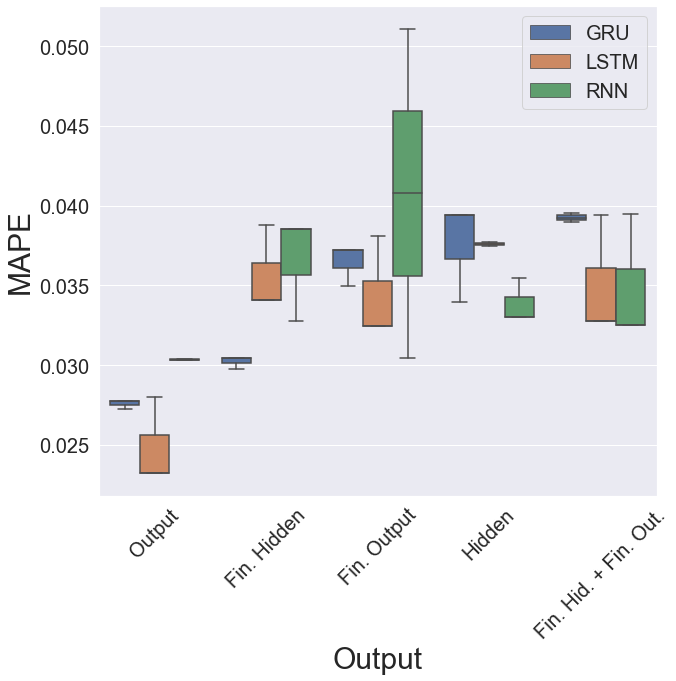

In [81]:
create_boxplots(result_df, 'Output', 'Temporal Type', sharey=True, subgroups=False)

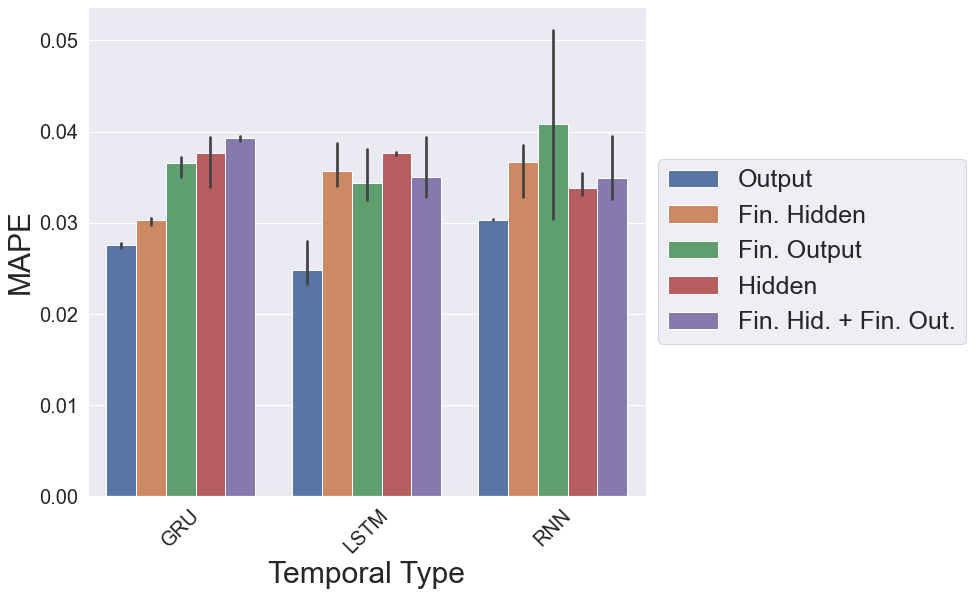

In [113]:
create_boxplots(result_df,'Temporal Type', 'Output', sharey=True, subgroups=False, bar=True, fname='/Figures/CNN_output+type')

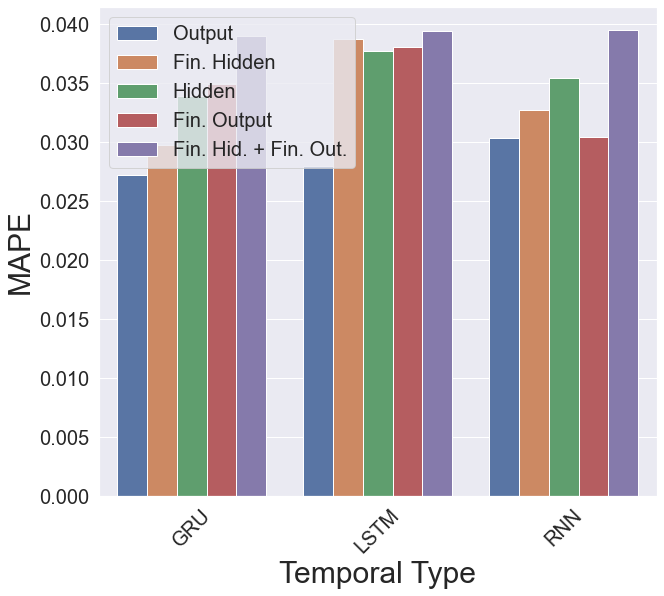

In [102]:
sum(result_df[result_df['FC'] == 'FC x3']['Overall MAE'])/len(result_df[result_df['FC'] == 'FC x3']) - sum(result_df[result_df['FC'] == 'FC x1']['Overall MAE'])/len(result_df[result_df['FC'] == 'FC x1'])

-0.0005936431619726901

In [101]:
sum(result_df[result_df['FC'] == 'FC x1']['Overall MAE'])/len(result_df[result_df['FC'] == 'FC x1'])

0.03437185289595144

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


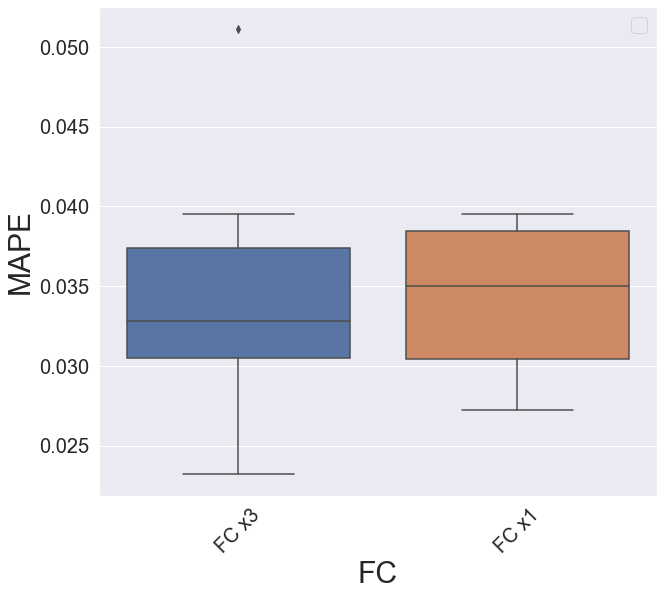

In [105]:
create_boxplots(result_df,'FC', sharey=True, subgroups=False, bar=False)

### Top 3

In [7]:
top_cnn = result_df.drop_duplicates().nsmallest(3, 'Overall MAE')

In [11]:
top_cnn.to_csv('../Results/KFCV/CNN/top3.csv')

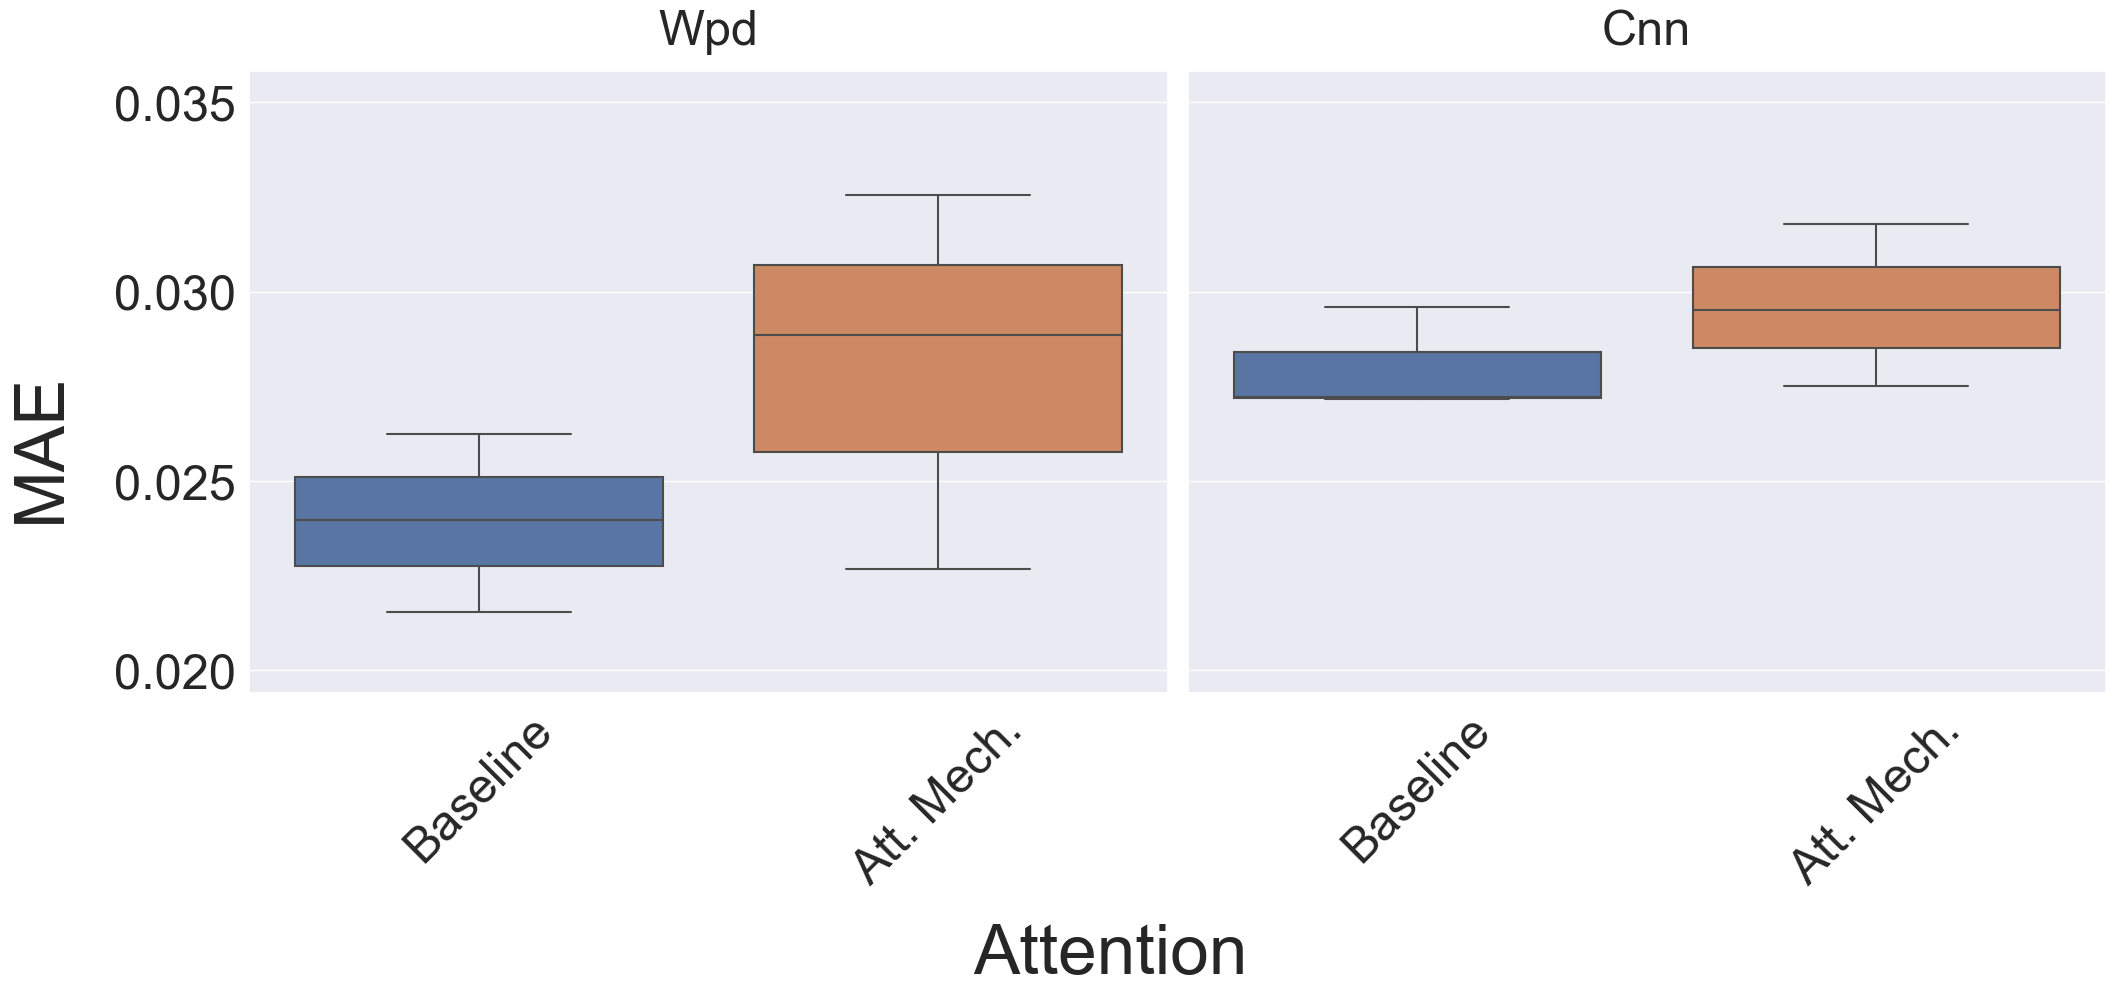

In [22]:
create_boxplots(all_res, 'Attention', 'Extraction Type', sharey=True, subgroups=True)

# Optimization

In [13]:
optimized = pd.concat([pd.read_csv('../Results/KFCV/Optimization/WPD_0'),
pd.read_csv('../Results/KFCV/Optimization/WPD_1'),
pd.read_csv('../Results/KFCV/Optimization/WPD_2')]
                     )

In [17]:
optimized = pd.concat([pd.read_csv('../Results/KFCV/Optimization/CNN_0'),
pd.read_csv('../Results/KFCV/Optimization/CNN_1'),
pd.read_csv('../Results/KFCV/Optimization/CNN_2')]
                     )

In [55]:
pd.read_csv('../Results/KFCV/Optimization/CNN_0')

,Unnamed: 0,FC,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Temporal type,Out,Loss fn,Batch size
0,0,FC x1,3.926917,11.580536,0.153676,0.136223,18.556635,6.333465,6.781241,0.035198,LSTM,output,MSELoss(),32


In [49]:
baseline = pd.read_csv('../Results/KFCV/CNN/top3.csv')

In [44]:
baseline = load_and_process_files("../Results/KFCV/WPD/Further FCs/", True)

In [50]:
baseline

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,FC
0,16,2.650822,9.627601,0.117193,0.122757,10.304832,4.426902,4.541684,0.027156,output,LSTM,FC x3
1,0,2.445230,10.345309,0.120572,0.128435,10.256577,3.741426,4.506258,0.027205,output,GRU,FC x3
2,24,3.152398,10.028225,0.146116,0.127491,11.944644,4.237875,4.939458,0.029592,output,LSTM,FC x1


In [18]:
optimized.reset_index()

,index,Unnamed: 0,FC,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Temporal type,Out,Loss fn,Batch size
0,0,0,FC x3,3.926917,11.580536,0.153676,0.136223,18.556635,6.333465,6.781241,0.035198,LSTM,output,MSELoss(),32
1,0,0,FC x3,3.273490,9.650541,0.144359,0.134070,18.560953,6.864690,6.438017,0.032240,GRU,output,MSELoss(),32
2,0,0,FC x1,8.198954,37.506070,0.274199,0.297998,58.592150,16.230260,20.183273,0.076583,LSTM,output,MSELoss(),32


In [62]:
import pickle
with open('../Results/KFCV/Optimization/CNN_2_train_val_test.pkl', 'rb') as f:
    train_loss, val_loss = pickle.load(f)

In [63]:
train_loss, val_loss

([[0.035044505598798265,
   0.025258559692420263,
   0.022955496869651617,
   0.020738889883577295,
   0.02015616904647477,
   0.018851804497561096,
   0.01932695982730494,
   0.017147588139746043,
   0.017681795790527775,
   0.01783569237893134,
   0.01712120396901021,
   0.015697454957423352,
   0.015213507062763768,
   0.01654918921237762,
   0.015459588234337558,
   0.014633794521204137,
   0.015240431837407888,
   0.0187060762922057,
   0.016984226338697218,
   0.015129124770451963,
   0.014787000966612745,
   0.015478753888633399,
   0.01632887580786395,
   0.0160764370163062,
   0.0151663065673701,
   0.014473323372349274,
   0.013701074649538614,
   0.013872642848904418,
   0.012344100512564182,
   0.01250759813835663,
   0.012976158294925648,
   0.012747511914642774,
   0.012831804194215653,
   0.011992022362166802,
   0.013697787764919015,
   0.01222619983837404,
   0.01294817441283206,
   0.01187098864465952,
   0.012093446324620626,
   0.012470692210723605,
   0.01395815941

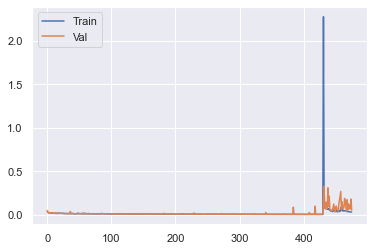

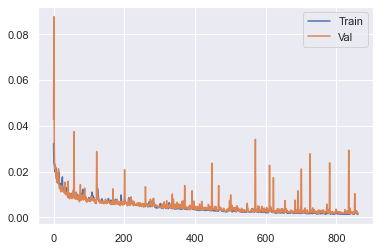

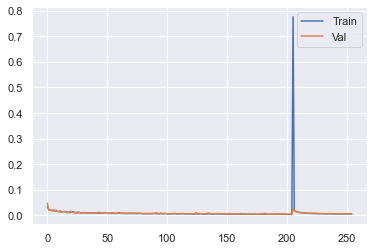

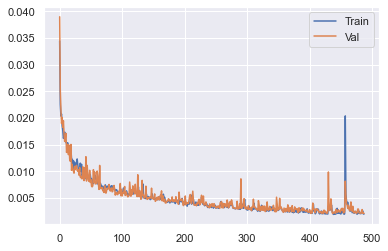

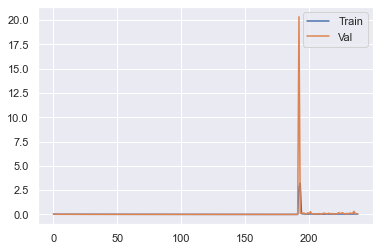

In [64]:
for i in range(5):
    plt.plot(range(len(train_loss[i])), train_loss[i], label="Train")
    plt.plot(range(len(val_loss[i])), val_loss[i], label="Val")
    plt.legend()
    plt.show()


# Final

In [323]:
wpd = load_and_process_files("../Results/KFCV/Final Comparison/MAE/WPD", True)
cnn = load_and_process_files("../Results/KFCV/Final Comparison/MAE/CNN", True)

0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output
0    Output
Name: Output, dtype: object output


In [351]:
cnn['Approach'] = '1D CNN'

In [352]:
wpd['Approach'] = 'WPD'

In [353]:
cnn_mae['Approach']  = 'CNN MAE'

In [354]:
all_res = pd.concat([cnn, wpd])

In [341]:
all_res = all_res.drop(columns=['FC', 'Temporal Type', 'Output', 'Overall MAE', 'Overall MAPE'])

In [139]:
all_res

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Run,Approach
0,3.080469,9.397013,0.129808,0.114594,16.588951,5.685780,5.832769,0,1D CNN
1,2.877732,9.440706,0.116973,0.126182,17.545076,6.033010,6.023280,1,1D CNN
2,2.843835,9.845325,0.127388,0.119058,16.201565,5.634633,5.795300,3,1D CNN
3,3.717296,10.131885,0.166484,0.133922,17.754747,6.158215,6.343758,4,1D CNN
4,2.562415,9.060903,0.116212,0.125260,18.061426,6.169204,6.015903,5,1D CNN
5,2.778148,10.034398,0.128164,0.148023,17.653011,6.524016,6.210960,6,1D CNN
6,3.106731,9.929071,0.135003,0.115125,15.493475,5.418769,5.699696,7,1D CNN
7,3.067066,9.496046,0.127225,0.128541,17.045307,6.079643,5.990638,8,1D CNN
8,2.859359,7.741533,0.122957,0.107588,16.520262,6.473414,5.637518,9,1D CNN
0,2.445120,9.684494,0.106808,0.135421,12.589968,3.777890,4.789950,0,WPD


In [342]:
all_res.columns = ['YM (Cutis)', 'YM (Hypodermis)', 'PR (Cutis)', 'PR (Hypodermis)', 'Perm (Cutis)', 'Perm (Hypodermis)', 'Run', 'Approach']

In [356]:
all_res.groupby('Approach').mean()[['Overall MAPE', 'Overall MAE']]

,Overall MAPE,Overall MAE
Approach,,
1D CNN,5.600879,0.030230
WPD,3.947531,0.026053


In [343]:
df = pd.melt(all_res, id_vars=['Run', 'Approach'], var_name='metric', value_name='value')


In [142]:
df

,Run,Approach,metric,value
0,0,1D CNN,YM (Cutis),3.080469
1,1,1D CNN,YM (Cutis),2.877732
2,3,1D CNN,YM (Cutis),2.843835
3,4,1D CNN,YM (Cutis),3.717296
4,5,1D CNN,YM (Cutis),2.562415
5,6,1D CNN,YM (Cutis),2.778148
6,7,1D CNN,YM (Cutis),3.106731
7,8,1D CNN,YM (Cutis),3.067066
8,9,1D CNN,YM (Cutis),2.859359
9,0,WPD,YM (Cutis),2.445120


## Dist

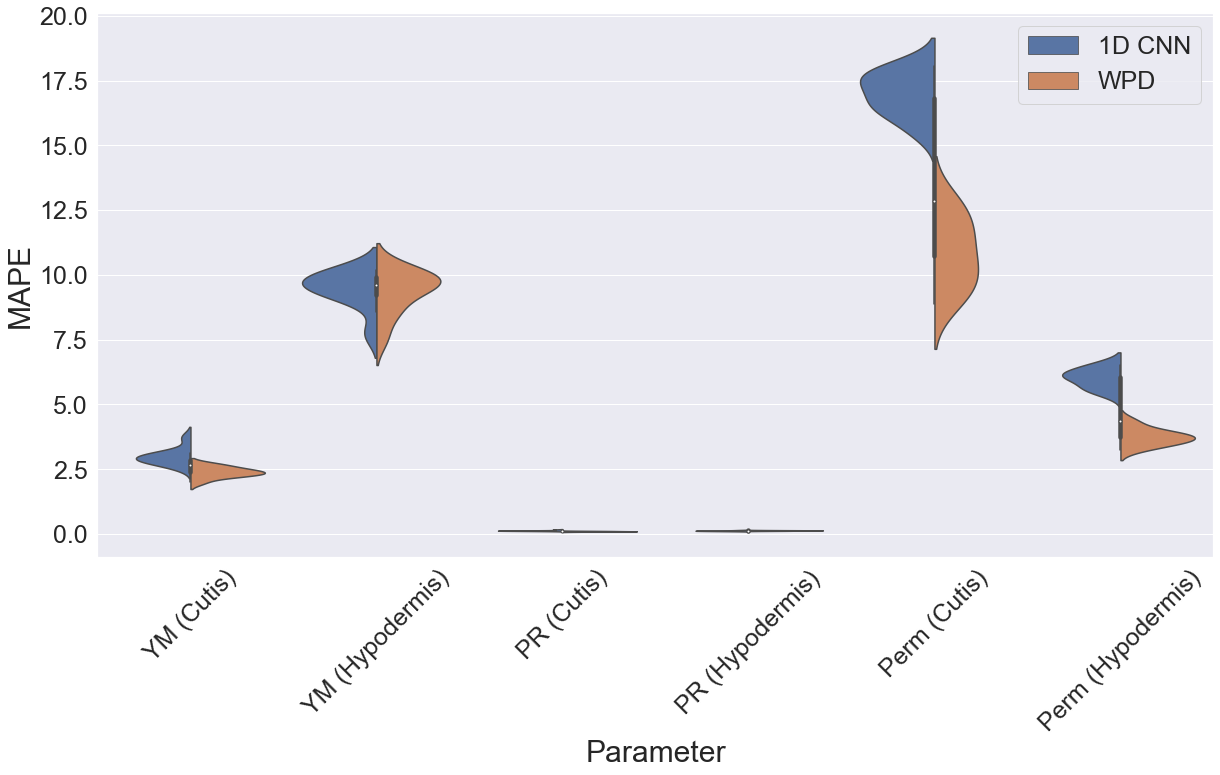

In [154]:
create_boxplots(df, 'Parameter', 'metric', sharey=True, subgroups=False, fname='/Figures/final_comp_params')

In [116]:
all_res = all_res.drop(columns=['FC', 'Temporal Type', 'Output'])

ValueError: Unable to parse string "Output" at position 160

In [345]:
df

,Run,Approach,metric,value
0,0,1D CNN,YM (Cutis),2.389251
1,1,1D CNN,YM (Cutis),2.376729
2,2,1D CNN,YM (Cutis),2.830906
3,3,1D CNN,YM (Cutis),2.745340
4,4,1D CNN,YM (Cutis),2.931932
5,5,1D CNN,YM (Cutis),3.009968
6,6,1D CNN,YM (Cutis),2.858763
7,7,1D CNN,YM (Cutis),4.448878
8,8,1D CNN,YM (Cutis),3.201782
9,9,1D CNN,YM (Cutis),2.859359


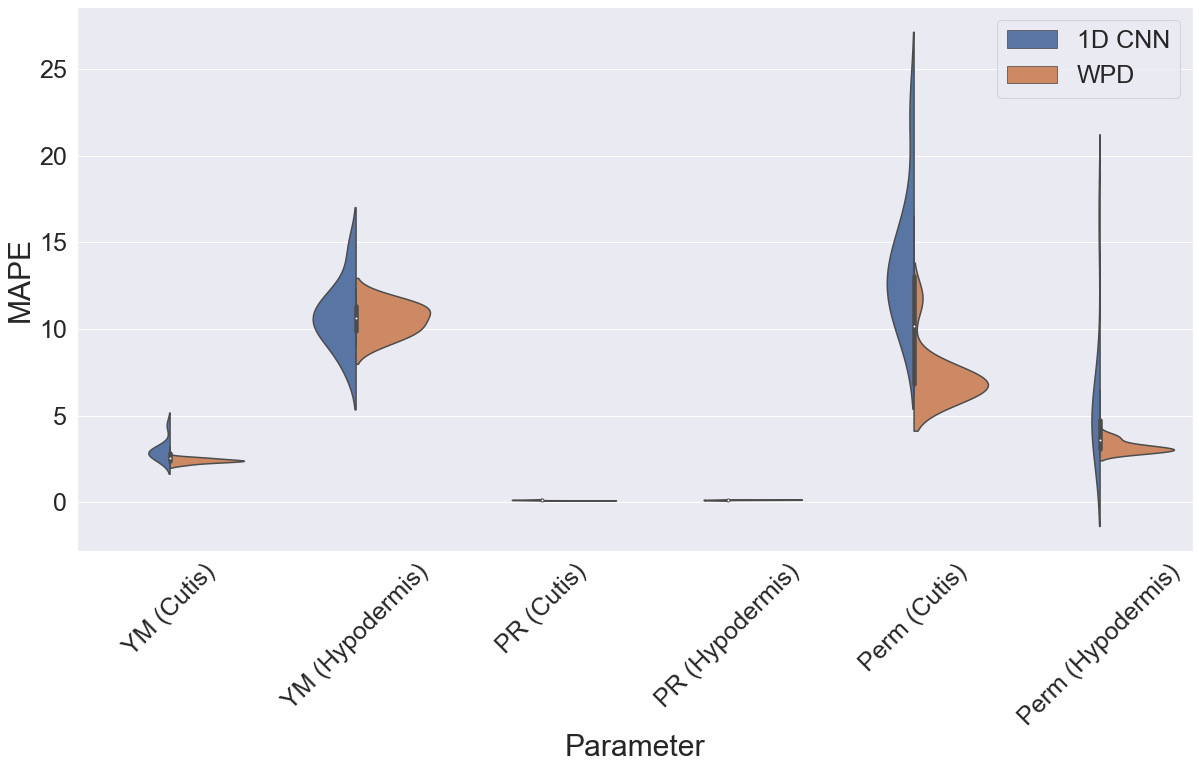

In [362]:
create_boxplots(df, 'Parameter', 'metric', sharey=True, subgroups=False, fname='/Figures/final_comp_params_MAE')

In [361]:
def create_boxplots(dataframe, order_column, filter_column=None, sharey=False, subgroups=True, fname=None, bar=False):
    if filter_column is None or not subgroups:
        # Create a single boxplot without filtering
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))
        if bar:
            sns.barplot(data=dataframe, y='value', x='Approach', hue=filter_column, ax=ax)
        else:
            sns.violinplot(x='metric', y='value', hue='Approach', data=dataframe, split=True)

        # Set the titles and labels for the boxplot
        plt.title('')
        plt.suptitle('')  # This line removes the automatically generated title
        plt.xlabel(order_column, fontsize=30)
        plt.ylabel('MAPE', fontsize=30)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tick_params(axis='both', labelsize=25)
        ax.legend(loc='best',  prop={'size': 25})
        #ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
        #ax.set_yticks([])
        
        #plt.tight_layout()
        # Display the boxplot
        plt.show()
    else:
        unique_filter_values = dataframe[filter_column].unique()
        num_plots = len(unique_filter_values)

        # Create a subplot for each unique filter value
        fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 10, 9), sharey=sharey, sharex=True, constrained_layout=True)
        
        min_value = 10
        max_value = -10
        for idx, filter_value in enumerate(unique_filter_values):
            # Filter the DataFrame based on the current filter_value
            filtered_df = dataframe[dataframe[filter_column] == filter_value]

            # Create a boxplot using the filtered DataFrame, ordering by the second column
            ax = axes[idx]
            sns.barplot(data=filtered_df, ax=ax, y='Overall MAPE', x=order_column)
            #filtered_df.boxplot(column='Overall MAE', by=order_column, grid=False, ax=ax)

            # Set the titles and labels for the boxplot
            ax.set_title(f'{filter_value.capitalize() if filter_column != "FC" and filter_column != "Temporal Type" else filter_value}', fontsize=35, y=1.05, horizontalalignment='center', verticalalignment='center')
            ax.set_ylabel('MAPE')
            ax.set_xlabel('')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
            ax.tick_params(axis='both', labelsize=35)
            ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})

            # Set y-axis limits independently based on the maximum value
            max_value_current = filtered_df['Overall MAPE'].max() * 1.1
            min_value_current = filtered_df['Overall MAPE'].min() * 0.9

            if sharey:
                min_value = min_value_current if min_value_current < min_value else min_value
                max_value = max_value_current if max_value_current > max_value else max_value
            else:
                min_value =min_value_current
                max_value = max_value_current
            ax.set_ylim(min_value, max_value)

          # Set the main title for all subplots
        fig.suptitle('')
        fig.supxlabel(order_column, fontsize=50, x=0.5, y=-0.1, horizontalalignment='center', verticalalignment='bottom')
        fig.supylabel('MAE', fontsize=50, x=-0.05, y=0.5, horizontalalignment='left', verticalalignment='center', rotation='vertical')
        for ax in axes.flatten():
            ax.legend(fontsize=35)
    # Display the boxplots
    #plt.tight_layout()
    plt.show()
    if fname:
        fig.savefig(f"../Results/{fname}.png", bbox_inches='tight')

#create_boxplots(result_df, 'Temporal Type', 'Fusion Method', subgroups=False, fname="Figures/wpd_tt.png")

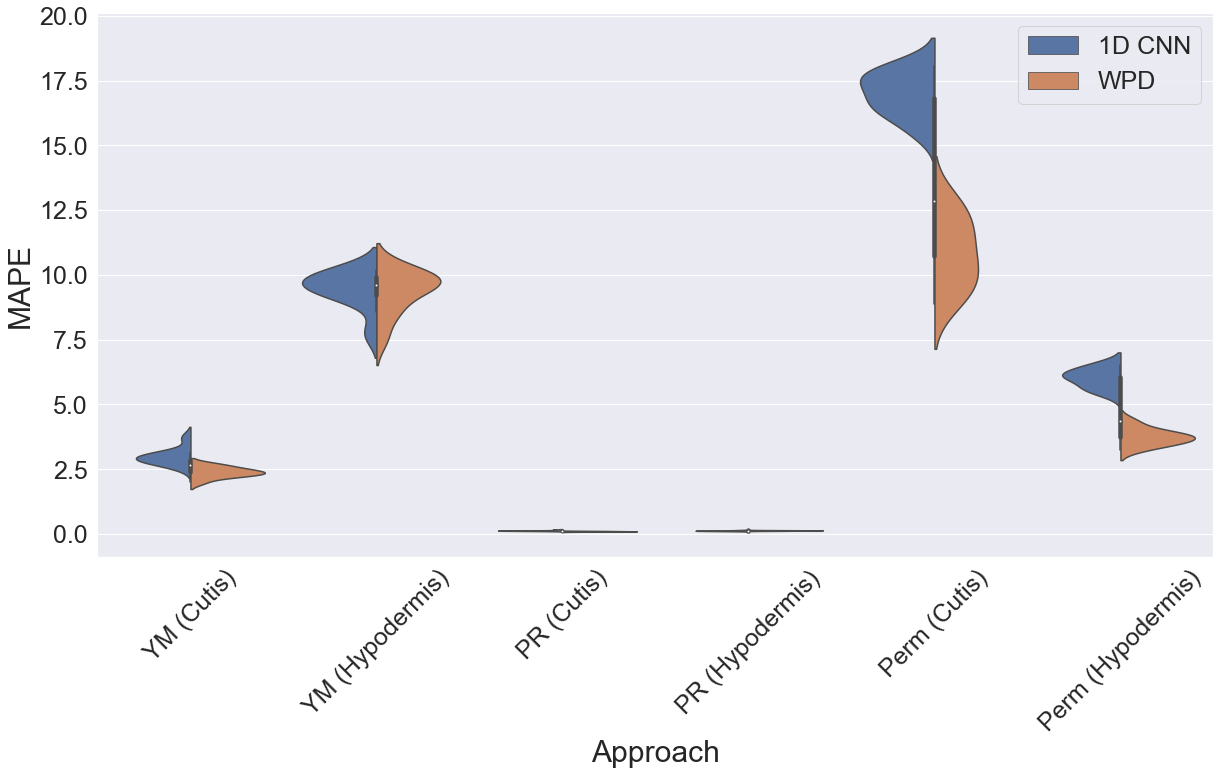

In [311]:
create_boxplots(all_res, 'Approach', sharey=True, subgroups=True, fname='/Figures/final_comp_MAE')

## MAE

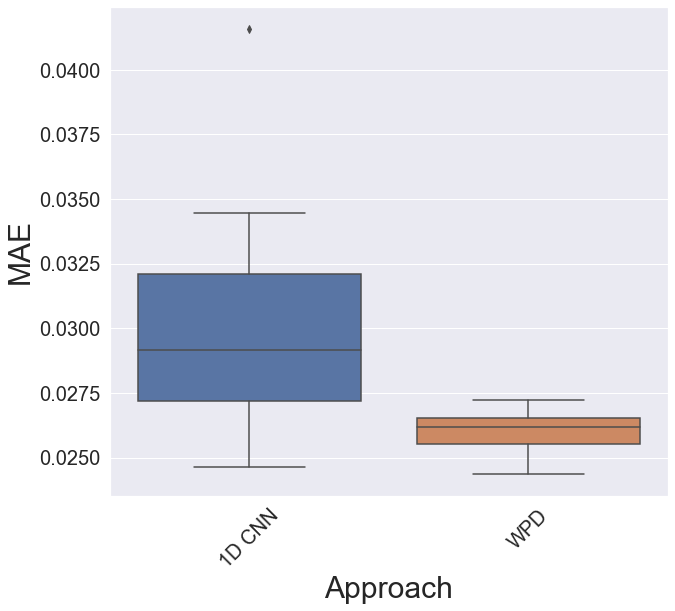

In [360]:
create_boxplots(all_res, 'Approach', sharey=True, subgroups=True, fname='/Figures/final_comp_MAE_MAE')

In [322]:
all_res

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Run,Output,Temporal Type,FC,Approach
0,2.389251,9.003532,0.116866,0.108673,10.014200,4.032490,4.277502,0.024647,0,Output,LSTM,FC x1,1D CNN
1,2.376729,10.098696,0.116778,0.112710,10.335631,3.454115,4.415776,0.025490,1,Output,LSTM,FC x1,1D CNN
2,2.830906,10.390703,0.138565,0.127720,11.205490,3.610437,4.717304,0.028448,2,Output,LSTM,FC x1,1D CNN
3,2.745340,9.833099,0.131404,0.109186,13.052716,4.300179,5.028654,0.027093,3,Output,LSTM,FC x1,1D CNN
4,2.931932,11.203516,0.143915,0.135272,14.876978,5.550236,5.806975,0.032620,4,Output,LSTM,FC x1,1D CNN
5,3.009968,10.777914,0.137830,0.130099,12.715406,4.697515,5.244789,0.029886,5,Output,LSTM,FC x1,1D CNN
6,2.858763,11.609174,0.130473,0.140541,13.060869,5.124784,5.487434,0.030564,6,Output,LSTM,FC x1,1D CNN
7,4.448878,14.648140,0.153540,0.142886,22.539482,16.420948,9.725647,0.041569,7,Output,LSTM,FC x1,1D CNN
8,3.201782,12.291875,0.159502,0.154469,13.355204,4.840294,5.667188,0.034468,8,Output,LSTM,FC x1,1D CNN
9,4.414405,20.940062,0.227479,0.320482,94.756760,10.893951,21.925526,0.062292,9,Output,LSTM,FC x1,1D CNN


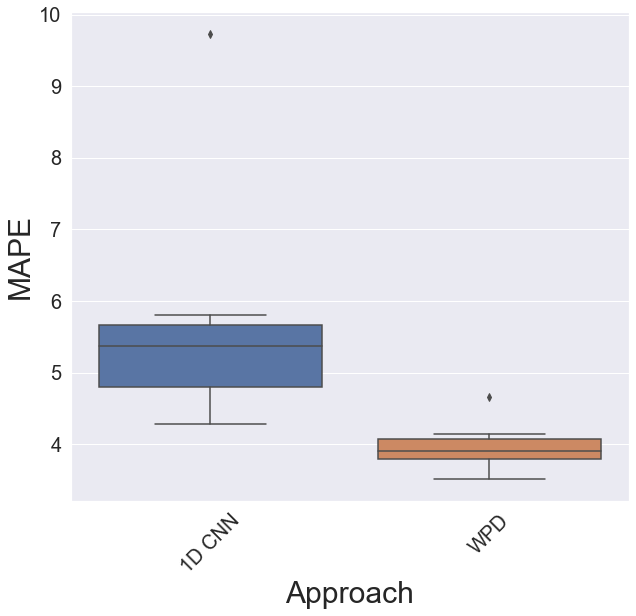

In [386]:
create_boxplots(all_res, 'Approach', sharey=True, subgroups=True, fname='/Figures/final_comp_MAPE_MAE')

In [ ]:
create_boxplots(all_res, 'Approach', sharey=True, subgroups=True )#fname='/Figures/final_comp_MAE')

In [385]:
def create_boxplots(dataframe, order_column, filter_column=None, sharey=False, subgroups=True, fname=None, bar=False):
    if filter_column is None or not subgroups:
        # Create a single boxplot without filtering
        fig, ax = plt.subplots(1, 1, figsize=(10, 9))
        if bar:
            sns.barplot(data=dataframe, y='Overall MAE', x=order_column, hue=filter_column, ax=ax)
        else:
            sns.boxplot(data=dataframe, y='Overall MAPE', x=order_column, hue=filter_column, ax=ax)

        # Set the titles and labels for the boxplot
        plt.title('')
        plt.suptitle('')  # This line removes the automatically generated title
        plt.xlabel(order_column, fontsize=30)
        plt.ylabel('MAPE', fontsize=30)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tick_params(axis='both', labelsize=20)
        #ax.legend(fontsize=20, loc='best')
        #ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
        #ax.set_yticks([])
        
        #plt.tight_layout()
        # Display the boxplot
        plt.show()
    else:
        unique_filter_values = dataframe[filter_column].unique()
        num_plots = len(unique_filter_values)

        # Create a subplot for each unique filter value
        fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 10, 9), sharey=sharey, sharex=True, constrained_layout=True)
        
        min_value = 10
        max_value = -10
        for idx, filter_value in enumerate(unique_filter_values):
            # Filter the DataFrame based on the current filter_value
            filtered_df = dataframe[dataframe[filter_column] == filter_value]

            # Create a boxplot using the filtered DataFrame, ordering by the second column
            ax = axes[idx]
            sns.barplot(data=filtered_df, ax=ax, y='Overall MAPE', x=order_column)
            #filtered_df.boxplot(column='Overall MAE', by=order_column, grid=False, ax=ax)

            # Set the titles and labels for the boxplot
            ax.set_title(f'{filter_value.capitalize() if filter_column != "FC" and filter_column != "Temporal Type" else filter_value}', fontsize=35, y=1.05, horizontalalignment='center', verticalalignment='center')
            ax.set_ylabel('MAPE')
            ax.set_xlabel('')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
            ax.tick_params(axis='both', labelsize=35)
            ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})

            # Set y-axis limits independently based on the maximum value
            max_value_current = filtered_df['Overall MAPE'].max() * 1.1
            min_value_current = filtered_df['Overall MAPE'].min() * 0.9

            if sharey:
                min_value = min_value_current if min_value_current < min_value else min_value
                max_value = max_value_current if max_value_current > max_value else max_value
            else:
                min_value =min_value_current
                max_value = max_value_current
            ax.set_ylim(min_value, max_value)

          # Set the main title for all subplots
        fig.suptitle('')
        fig.supxlabel(order_column, fontsize=50, x=0.5, y=-0.1, horizontalalignment='center', verticalalignment='bottom')
        fig.supylabel('MAE', fontsize=50, x=-0.05, y=0.5, horizontalalignment='left', verticalalignment='center', rotation='vertical')
        for ax in axes.flatten():
            ax.legend(fontsize=35)
    # Display the boxplots
    #plt.tight_layout()
    plt.show()
    if fname:
        fig.savefig(f"../Results/{fname}.png", bbox_inches='tight')

#create_boxplots(result_df, 'Temporal Type', 'Fusion Method', subgroups=False, fname="Figures/wpd_tt.png")

<AxesSubplot:xlabel='metric', ylabel='value'>

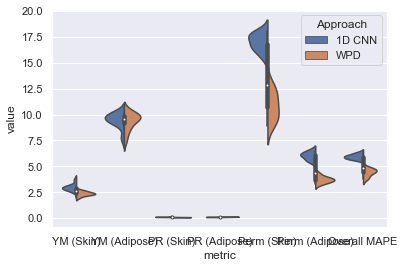

In [100]:
sns.violinplot(x='metric', y='value', hue='Approach', data=df, split=True)


In [155]:
all_res.groupby('Approach').mean()

,YM (Cutis),YM (Hypodermis),PR (Cutis),PR (Hypodermis),Perm (Cutis),Perm (Hypodermis),Run,Approach
0,3.080469,9.397013,0.129808,0.114594,16.588951,5.685780,0,1D CNN
1,2.877732,9.440706,0.116973,0.126182,17.545076,6.033010,1,1D CNN
2,2.843835,9.845325,0.127388,0.119058,16.201565,5.634633,3,1D CNN
3,3.717296,10.131885,0.166484,0.133922,17.754747,6.158215,4,1D CNN
4,2.562415,9.060903,0.116212,0.125260,18.061426,6.169204,5,1D CNN
5,2.778148,10.034398,0.128164,0.148023,17.653011,6.524016,6,1D CNN
6,3.106731,9.929071,0.135003,0.115125,15.493475,5.418769,7,1D CNN
7,3.067066,9.496046,0.127225,0.128541,17.045307,6.079643,8,1D CNN
8,2.859359,7.741533,0.122957,0.107588,16.520262,6.473414,9,1D CNN
0,2.445120,9.684494,0.106808,0.135421,12.589968,3.777890,0,WPD


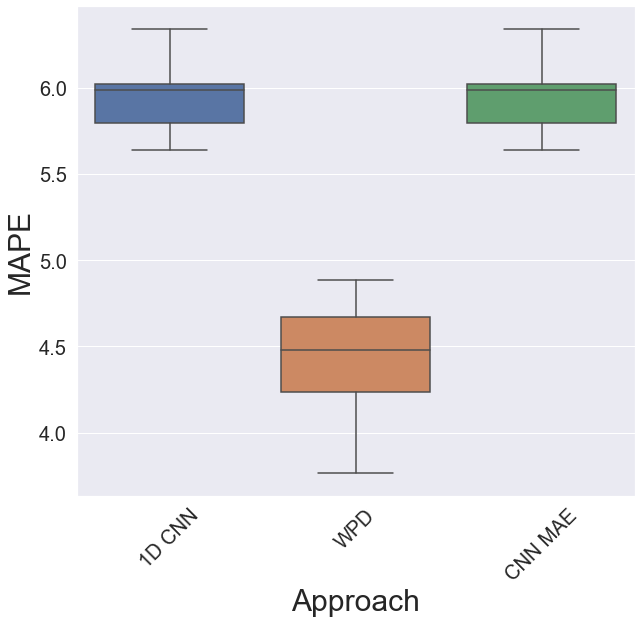

In [168]:
create_boxplots(all_res, 'Approach', sharey=True, fname='Figures/final_comp')

In [39]:
grouped = all_res.groupby('Approach').mean()

In [47]:
grouped = grouped.drop(columns=['Run', 'Overall MAE'])

In [48]:
grouped.columns = ['YM (Cutis)', 'YM (Hypodermis)', 'PR (Cutis)', 'PR (Hypodermis)', 'Perm (Cutis)', 'Perm (Hypodermis)', 'Overall MAPE',]

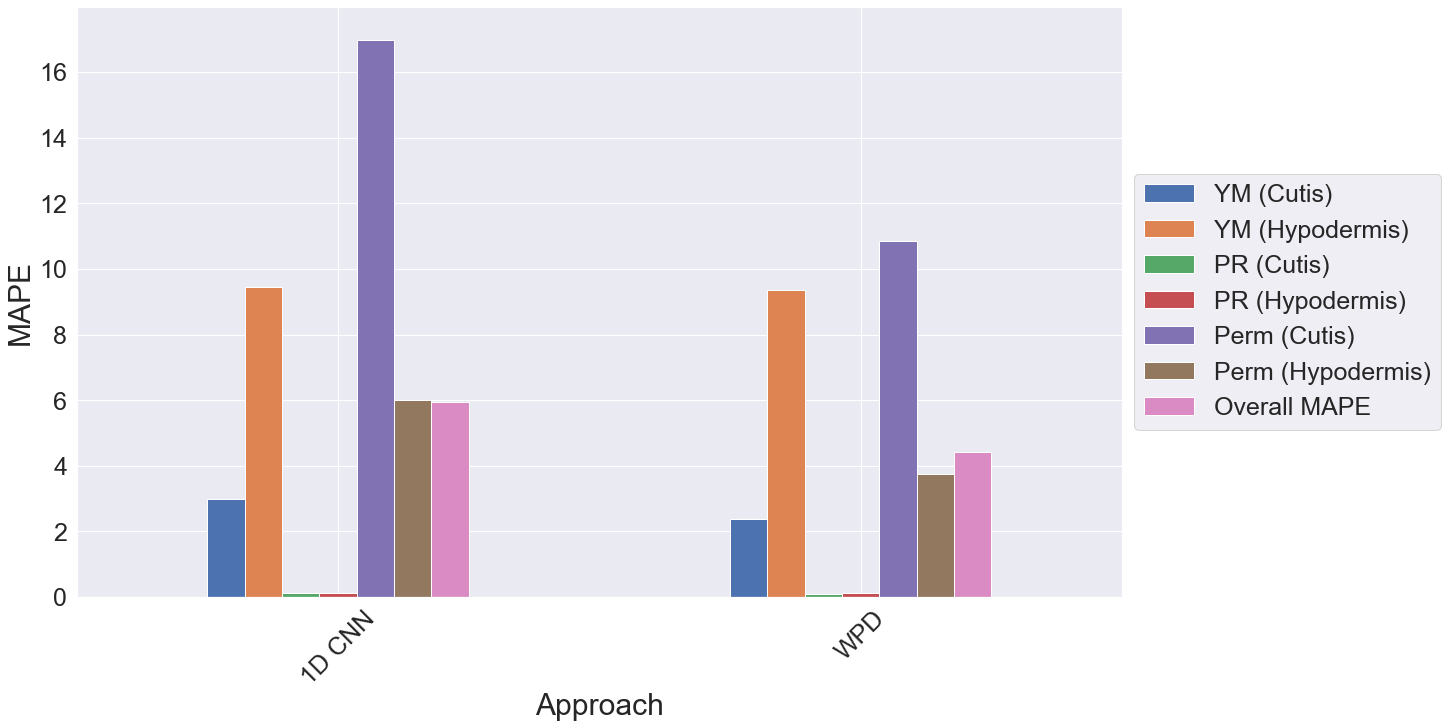

In [49]:
sns.set_theme()
plot_parameter_bars(grouped, max_y=grouped.max().max() + 1)

In [33]:
def plot_parameter_bars(df, fname=None, max_y=10):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
    df.plot.bar(ax=ax)
    
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    ax.set_ylabel("MAPE", fontsize=30)
    ax.set_xlabel("Approach", fontsize=30)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
    #ax.set_title("Average percent correctness 100-MAPE", size=40, y=1.08)
    ax.set_ylim(0, max_y)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tick_params(axis='both', labelsize=25)

    #fig.savefig(f"../Results/figures/CNNComp.png", bbox_inches='tight')


In [296]:
cnn

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Run,Output,Temporal Type,FC,Approach
0,3.080469,9.397013,0.129808,0.114594,16.588951,5.685780,5.832769,0.028771,0,Output,LSTM,FC x1,1D CNN
1,2.877732,9.440706,0.116973,0.126182,17.545076,6.033010,6.023280,0.028707,1,Output,LSTM,FC x1,1D CNN
2,2.843835,9.845325,0.127388,0.119058,16.201565,5.634633,5.795300,0.028400,3,Output,LSTM,FC x1,1D CNN
3,3.717296,10.131885,0.166484,0.133922,17.754747,6.158215,6.343758,0.033803,4,Output,LSTM,FC x1,1D CNN
4,2.562415,9.060903,0.116212,0.125260,18.061426,6.169204,6.015903,0.027382,5,Output,LSTM,FC x1,1D CNN
5,2.778148,10.034398,0.128164,0.148023,17.653011,6.524016,6.210960,0.031061,6,Output,LSTM,FC x1,1D CNN
6,3.106731,9.929071,0.135003,0.115125,15.493475,5.418769,5.699696,0.029090,7,Output,LSTM,FC x1,1D CNN
7,3.067066,9.496046,0.127225,0.128541,17.045307,6.079643,5.990638,0.029489,8,Output,LSTM,FC x1,1D CNN
8,2.859359,7.741533,0.122957,0.107588,16.520262,6.473414,5.637518,0.027519,9,Output,LSTM,FC x1,1D CNN


In [347]:
import numpy as np
from scipy.stats import mannwhitneyu

# Sample data: Performance results for each method across 10 seeds
wpd_performance = wpd['Overall MAE']
other_method_performance = cnn['Overall MAE']

# Perform the one-tailed Mann-Whitney U test
stat, p_value = mannwhitneyu(wpd_performance, other_method_performance, alternative='less')

# Define the significance level
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print(f"The WPD method performs significantly better than the CNN method (p-value = {p_value:.4f})")
else:
    print(f"There is no significant difference between the WPD method and the CNN method, or the CNN method performs better (p-value = {p_value:.4f})")


The WPD method performs significantly better than the other method (p-value = 0.0086)


In [179]:
dataset = get_dataset()

100%|█████████████████████████████████████████████████████████████████████████████| 2241/2241 [00:13<00:00, 161.98it/s]


In [171]:
dataset[0][0]

{'input': tensor([[-3.2060e-05,  4.9572e-04,  5.7828e-04,  5.8836e-04,  5.8984e-04,
           5.9006e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,  5.9010e-04,
           5.901

In [218]:
ds = get_dataset(runs=[10])

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.56it/s]


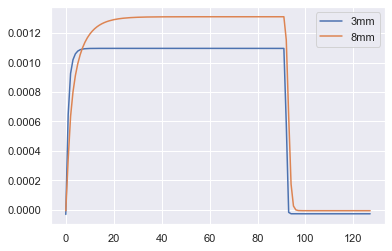

In [216]:
plt.plot(range(128), ds[0][0]['input'][0].cpu(), label="3mm")
plt.plot(range(128), ds[0][0]['input'][1].cpu(), label="8mm")
plt.legend()

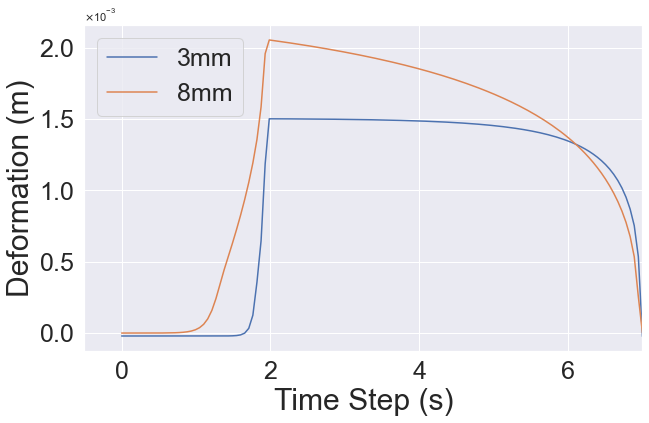

In [240]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(10, 6))
# plot your data here
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(0,0))

x = np.linspace(0, 7, num=128)
ax.plot(x,np.flip(dataset[0][7]['input'][0].cpu().numpy()), label="3mm")
ax.plot(x, np.flip(dataset[0][7]['input'][1].cpu().numpy()), label="8mm")
ax.legend(loc='best',  prop={'size': 25})
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_ylabel("Deformation (m)", fontsize=30)
ax.set_xlabel("Time Step (s)", fontsize=30)
ax.set_xlim([-0.5, 7])

#fig.savefig(f"../Results/figures/good_curves.png", bbox_inches='tight')
    
plt.show()

In [246]:
print(dataset[0][7]['input'][0][0],dataset[0][7]['input'][0][125:])

tensor(-2.5671e-05, device='cuda:0') tensor([-2.2303e-05, -2.2303e-05, -2.2303e-05], device='cuda:0')


In [248]:
a = 5930.8175756931305 + 7094.759701251984 + 6042.780512809753 + 5725.691621303558 + 6537.32342171669 + 8498.006009101868 + 7240.362908363342 + 7942.70317029953 + 6695.090709924698 + 7709.288030862808

In [250]:
(a/10)/5

1388.3364732265472

In [251]:
b = 11304.468074560165 +11566.486863136292 + 11609.053621530533 + 10359.377562046051 + 10359.377562046051 + 13039.14113855362 + 10849.329654693604 + 12384.702291488647 + 12413.292219877243 + 14669.155878543854

In [252]:
(b/10)/5

2371.0876973295212

In [259]:
import os

def calculate_average_time(directory):
    time_sum = 0.0
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith("_time.txt"):
            with open(os.path.join(directory, filename), "r") as f:
                time = float(f.readline().strip())
                time_sum += time
                count += 1

    average_time = (time_sum /10) / 5
    return average_time


In [260]:
calculate_average_time('../Results/KFCV/Final Comparison/Stats')

1388.3364732265472

In [261]:
calculate_average_time('../Results/KFCV/Final Comparison/CNN')

2093.590722293854

In [262]:
calculate_average_time('../Results/KFCV/Final Comparison/CNN/New')

2163.9001460886

In [301]:
import os
import pickle

def get_average_length(directory):
    lengths = []
    for filename in os.listdir(directory):
        if filename.endswith("_train_val.pkl"):
            with open(os.path.join(directory, filename), "rb") as f:
                data = pickle.load(f)
                lengths.append(len(data[0][0]))
                print(len(data[0][0]))
    if len(lengths) == 0:
        return 0
    print("LENS:", lengths)
    return np.mean(lengths)


In [305]:
get_average_length('../Results/KFCV/Final Comparison/Stats')

660
LENS: [660]


660.0

# Final stats

In [367]:
stat_epoch = get_average_length('../Results/KFCV/Final Comparison/MAE/WPD')
stat_time = calculate_average_time('../Results/KFCV/Final Comparison/MAE/WPD')
cnn_epoch = get_average_length('../Results/KFCV/Final Comparison/MAE/CNN')
cnn_time = calculate_average_time('../Results/KFCV/Final Comparison/MAE/CNN')

print("WPD", stat_epoch, stat_time)
print("CNN", cnn_epoch, cnn_time)

984
LENS: [984]
666
LENS: [666]
WPD 984.0 2691.851999988556
CNN 666.0 2524.589898610115


In [364]:
wpd

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Run,Output,Temporal Type,FC,Approach
0,2.326808,9.095709,0.100506,0.131889,6.471819,2.961414,3.514691,0.024366,0,Output,LSTM,FC x1,WPD
1,2.275676,9.935280,0.098894,0.147210,7.104614,3.221674,3.797225,0.025574,1,Output,LSTM,FC x1,WPD
2,2.383534,11.280802,0.105504,0.140782,6.431735,2.931818,3.879029,0.026431,3,Output,LSTM,FC x1,WPD
3,2.570073,11.169363,0.111402,0.142246,7.562563,3.286195,4.140307,0.026983,4,Output,LSTM,FC x1,WPD
4,2.382296,10.068271,0.102683,0.136673,6.186432,3.054665,3.655170,0.025487,5,Output,LSTM,FC x1,WPD
5,2.577708,11.844293,0.110331,0.144283,7.247116,2.833163,4.126149,0.027241,6,Output,LSTM,FC x1,WPD
6,2.396523,10.729190,0.107250,0.142748,6.656637,3.619953,3.942050,0.026051,7,Output,LSTM,FC x1,WPD
7,2.424640,10.483389,0.106869,0.153086,6.639714,3.069811,3.812918,0.026574,8,Output,LSTM,FC x1,WPD
8,2.155053,11.371622,0.094426,0.146565,6.872850,3.026699,3.944536,0.025503,9,Output,LSTM,FC x1,WPD
9,2.480679,9.604899,0.112328,0.135279,11.778746,3.867477,4.663235,0.026324,2,Output,LSTM,FC x1,WPD


In [290]:
from torchviz import make_dot
from torch.autograd import Variable
import torch

In [292]:
x = Variable(torch.randn(1, 2, 128))
net = MultiTemporal(out='output')

FC in: 131072 HS 256


In [293]:
y = net(x)
dot = make_dot(y, params=dict(net.named_parameters()))
dot.render('net', format='png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
dummy_input = torch.randn(1, 1, 1024)
make_dot(model(dummy_input), params=dict(model.named_parameters()))

In [377]:
model = MultiTemporal(out='output',
                          conv=False,
                          fusion_method='independent',
                          single_fc=True,
                          input_size=2048,
                          hidden_size=4096,
                          )
model2 = MultiTemporal(out='output',
                          single_fc=True,
                          input_size=15,
                          hidden_size=128,
                          )

FC in: 8192 HS 4096
FC in: 65536 HS 128


In [369]:
from torch.utils.tensorboard import SummaryWriter

In [380]:
from torch.utils.tensorboard import SummaryWriter
x = torch.randn(32, 1, 2048)
writer = SummaryWriter("torchlogs/")
writer.add_graph(model, x)
writer.close()

In [382]:
from torchsummary import summary
model = MultiTemporal(out='output',
                          single_fc=True,
                          input_size=15,
                          hidden_size=128,
                          ).cuda()
summary(model, (2, 128), batch_size=32)

FC in: 65536 HS 128
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [32, 128, 126]           1,280
       BatchNorm1d-2             [32, 128, 126]             256
              ReLU-3             [32, 128, 126]               0
         MaxPool1d-4              [32, 128, 61]               0
            Conv1d-5              [32, 256, 61]          98,304
       BatchNorm1d-6              [32, 256, 61]             512
              ReLU-7              [32, 256, 61]               0
         MaxPool1d-8              [32, 256, 30]               0
            Conv1d-9              [32, 512, 30]         393,216
      BatchNorm1d-10              [32, 512, 30]           1,024
             ReLU-11              [32, 512, 30]               0
        MaxPool1d-12              [32, 512, 15]               0
              RNN-13  [[-1, 512, 128], [-1, 2, 128]]               0
           Lin